<div style=" background-color: RGB(24,29,198);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 CRUDER LEA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python
</h2>

<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse en composantes principales</h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">5.1 - Importation des librairies </h3>

In [1]:
# Importation des librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor


<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">5.2 -  Importation des fichiers </h3>

In [2]:
# Importation du fichier complet

df = pd.read_csv('Table_finale.csv', sep=',', index_col=0)

In [3]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
# Importation du fichier sans outliers

df_ss_outliers = pd.read_csv('Table_sans_outliers.csv', sep=',', index_col=0)

In [5]:
df_ss_outliers

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
5,1,172.17,103.74,104.08,4.42,2.95,112.81
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">5.3 - Recherche et analyse des dimensions </h3>

In [6]:
# Préparation des données 


# Sélection des variables quantitatives
quant_vars = df.select_dtypes(include=['float64'])

X = quant_vars.values


# Enregistrement de la variable qualitative

qual_vars = df.select_dtypes(include=['int64'])

In [7]:
X[:10]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54],
       [172.17, 103.74, 104.08,   4.42,   2.95, 112.81],
       [172.34, 104.18, 103.85,   4.58,   3.26, 112.81],
       [171.88, 103.76, 104.08,   3.98,   2.92, 113.08],
       [172.47, 103.92, 103.67,   4.  ,   3.25, 112.85],
       [172.47, 104.07, 104.02,   4.04,   3.25, 113.45]])

In [8]:
# Enregistrement de l'index dans une variable

names = quant_vars.index
names

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499],
           dtype='int64', length=1500)

In [9]:
# Enregistrement des features (noms des colonnes)

features_names = quant_vars.columns
features_names

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [10]:
# Normalisation

# Sélection des colonnes avec plus de poids 
ind_col_rbst= [1,2,3,4,5]
ind_col_std = [0]

# Transformateur de colonnes
transformateur_colonnes = ColumnTransformer(
    transformers=[
        ('robust', preprocessing.RobustScaler(quantile_range=(25, 75)), ind_col_rbst),
        ('std', preprocessing.StandardScaler(), ind_col_std)
        ])

# Appliquer normalisation

X_scaled = transformateur_colonnes.fit_transform(X)

In [11]:
X_scaled.shape

(1500, 6)

In [12]:
# Verif moyenne à 0 et std (ecart-type) à 1

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,-0.03,0.00,0.20,0.04,-0.21,-0.0
std,0.73,0.74,0.78,0.72,0.67,1.0


In [13]:
# On choisit de travailler sur 5 composantes max

n_components = 5

In [14]:
# Instance de l'ACP

pca = PCA(n_components=n_components)

In [15]:
# Entrainement de l'ACP sur les données scalées

pca.fit(X_scaled)

PCA(n_components=5)

In [16]:
# Vérification des composantes par la variance expliquée

pca.explained_variance_ratio_

array([0.38047901, 0.26897469, 0.11573202, 0.1053038 , 0.08655156])

In [17]:
# Enregistrement dans une variable

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([38.05, 26.9 , 11.57, 10.53,  8.66])

In [18]:
# Somme cumulée 

scree_cum = scree.cumsum().round()
scree_cum

array([38., 65., 77., 87., 96.])

In [19]:
# Préparation pour l'éboulis des valeurs propres

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

In [20]:
# Les composantes : calcul du nombre 

pcs = pca.components_
pcs

array([[ 0.31555823,  0.39135487,  0.54357118,  0.42124749, -0.46220261,
        -0.24640219],
       [ 0.1651387 ,  0.13488215,  0.0880336 ,  0.10542072, -0.08701905,
         0.9633796 ],
       [ 0.93056436, -0.14982833, -0.16746973, -0.23915142,  0.13861654,
        -0.08454223],
       [-0.02462773,  0.87751403, -0.17140584, -0.40991627,  0.1736392 ,
        -0.04243491],
       [-0.07703694, -0.18744472,  0.61690673, -0.73677328, -0.1824592 ,
         0.04721913]])

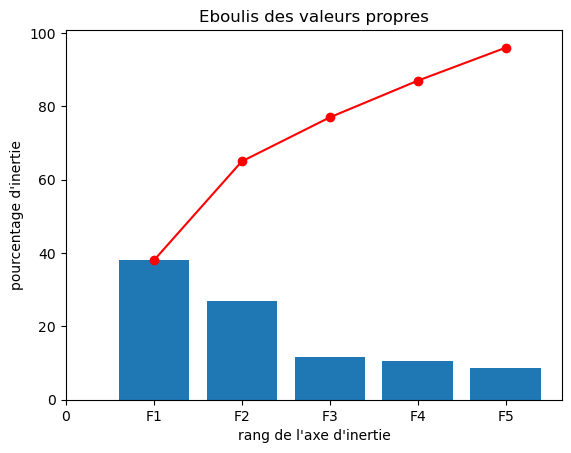

In [21]:
# Affichage du graph

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(6), [0,'F1', 'F2', 'F3','F4','F5'])
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

3 dimensions nous expliquent 77% des données, on va donc s'arrêter à 3

In [22]:
# Affichage des coefficients de chaque variable sur toutes les dimensions

pcs = pd.DataFrame(pcs)
pcs.columns = features_names
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,0.32,0.39,0.54,0.42,-0.46,-0.25
F2,0.17,0.13,0.09,0.11,-0.09,0.96
F3,0.93,-0.15,-0.17,-0.24,0.14,-0.08
F4,-0.02,0.88,-0.17,-0.41,0.17,-0.04
F5,-0.08,-0.19,0.62,-0.74,-0.18,0.05


<Axes: >

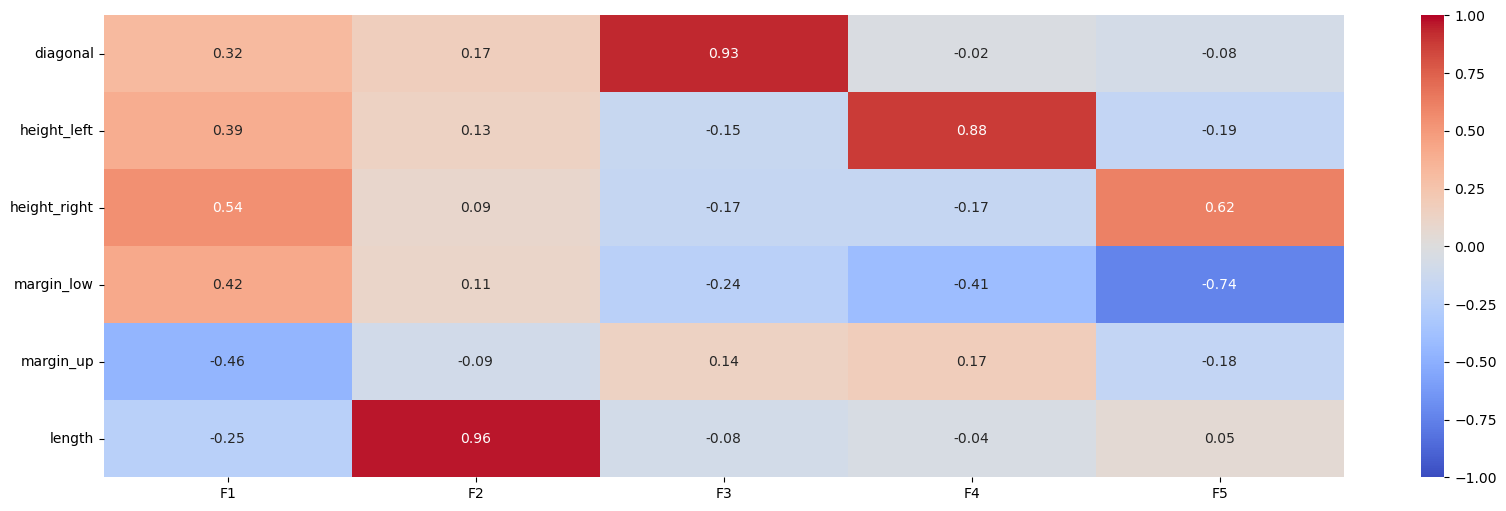

In [23]:
# Représentation visuelle 

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [24]:
# Calcul de la valeur propre 

# Analyse des valeurs propres

comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(5)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,1.389810,38.0,38.0
1,Dim2,0.982508,27.0,65.0
2,Dim3,0.422745,12.0,77.0
3,Dim4,0.384653,11.0,87.0
4,Dim5,0.316155,9.0,96.0


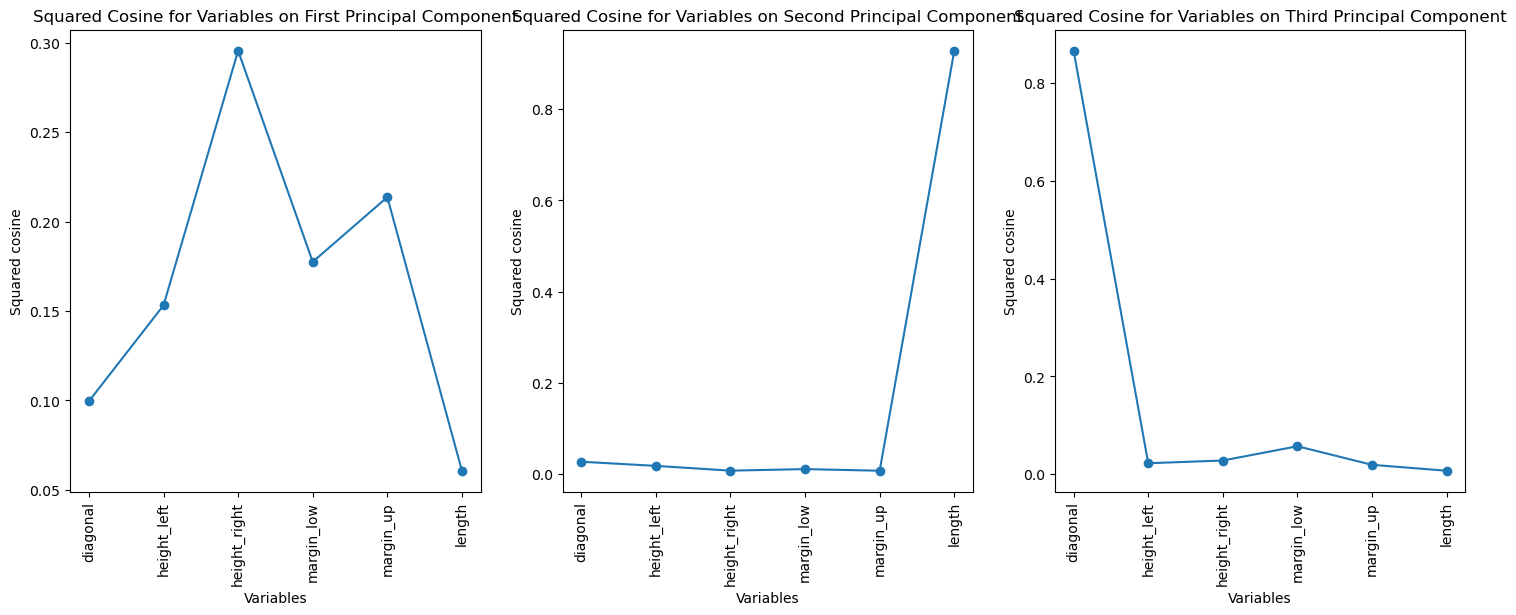

In [25]:
# Calculer les carrés des cosinus des variables sur les axes principaux
cos2 = pca.components_ ** 2
row_sums = cos2.sum(axis=1)
cos2 = cos2 / row_sums[:, np.newaxis]

# Afficher les graphiques des carrés des cosinus des variables sur les axes principaux pour le premier, le deuxième et le troisième axe principal
n_comp = pca.n_components_
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(range(1, len(features_names)+1), cos2[0,:], '-o')
axs[0].set_xticks(range(1, len(features_names)+1))
axs[0].set_xticklabels(features_names, rotation=90, fontsize=10)
axs[0].set_xlabel("Variables")
axs[0].set_ylabel("Squared cosine")
axs[0].set_title("Squared Cosine for Variables on First Principal Component")
axs[1].plot(range(1, len(features_names)+1), cos2[1,:], '-o')
axs[1].set_xticks(range(1, len(features_names)+1))
axs[1].set_xticklabels(features_names, rotation=90, fontsize=10)
axs[1].set_xlabel("Variables")
axs[1].set_ylabel("Squared cosine")
axs[1].set_title("Squared Cosine for Variables on Second Principal Component")
axs[2].plot(range(1, len(features_names)+1), cos2[2,:], '-o')
axs[2].set_xticks(range(1, len(features_names)+1))
axs[2].set_xticklabels(features_names, rotation=90, fontsize=10)
axs[2].set_xlabel("Variables")
axs[2].set_ylabel("Squared cosine")
axs[2].set_title("Squared Cosine for Variables on Third Principal Component")
plt.show()

In [26]:
# On choisit donc 3 composantes 

n_components = 3
pca = PCA(n_components=n_components)

In [27]:
pca.fit(X_scaled)

PCA(n_components=3)

In [28]:
# Vérification des composantes par la variance expliquée

pca.explained_variance_ratio_

array([0.38047901, 0.26897469, 0.11573202])

In [29]:
# Projection sur F1 F2 et F3 

X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ['F1', 'F2','F3'])
X_proj[:10]

,F1,F2,F3
0,1.300689,0.089016,1.779610
1,-1.158220,-2.077783,-0.988094
2,-1.119537,2.252322,1.188232
3,-0.622887,-2.123033,0.251637
4,0.165667,-0.690047,0.615693
5,-0.603794,0.518700,-0.593180
6,-0.096613,1.280914,0.173485
7,-0.770322,-0.462353,-0.329746
8,-0.959999,1.465487,-0.265380
9,-0.719361,1.597483,0.011497


In [30]:
# Fonction pour visualiser la projection sur les axes factoriels

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='8', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

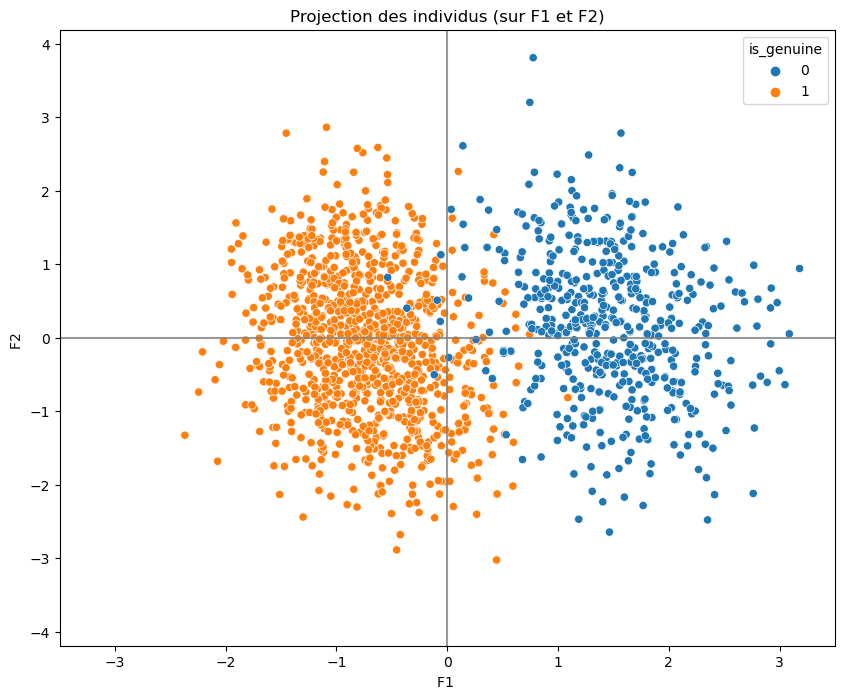

In [31]:
# Visualisation sur F1 et F2 avec type de billet

x_y = (0,1)
display_factorial_planes (X_proj,x_y, clusters=df['is_genuine'])

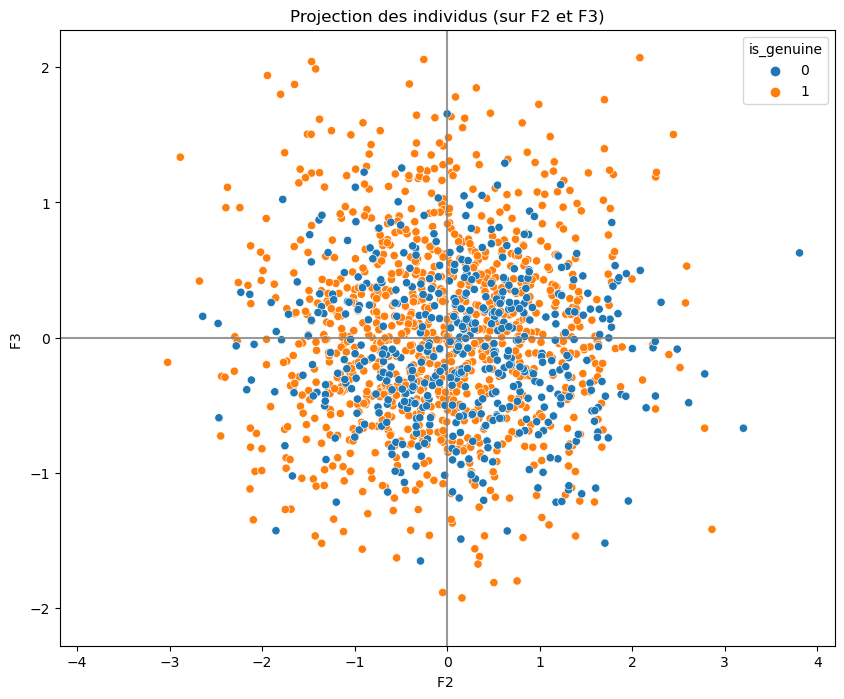

In [32]:
# Sur F2 et F3 

x_y = (1,2)
display_factorial_planes (X_proj,x_y, clusters=df['is_genuine'])

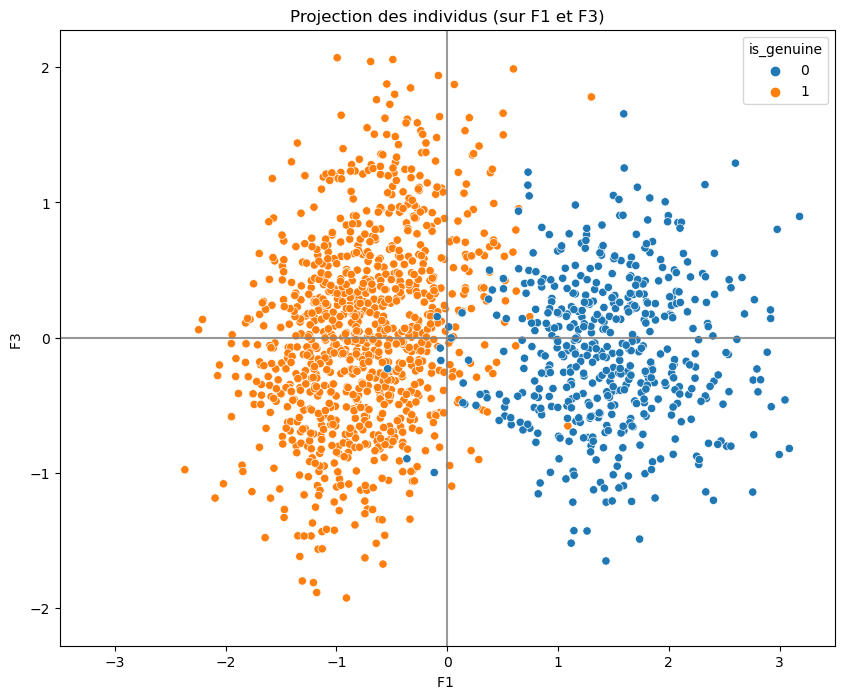

In [33]:
# Visualisation sur F1 et F3

x_y = (0,2)
display_factorial_planes (X_proj,x_y, clusters=df['is_genuine'])

Text(0.5, 0.92, 'Projection des billets sur les 3 dimensions')

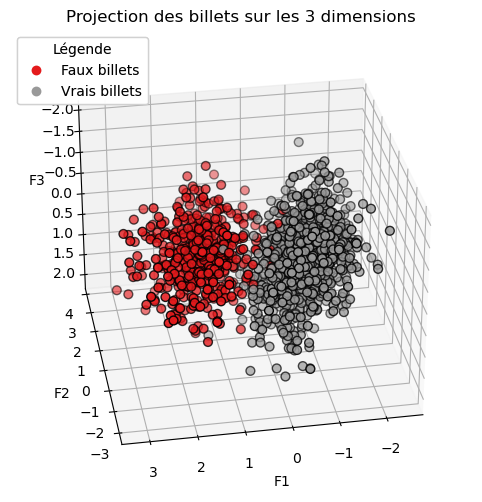

In [34]:
# Avec les 3 dimensions 

fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=100)

scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    cmap="Set1", edgecolor="k", s=40, c=df['is_genuine'])

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Faux billets','Vrais billets']], 
                    title='Légende', loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des billets sur les 3 dimensions')

Text(0.5, 0.92, 'Projection des billets sur les 3 dimensions')

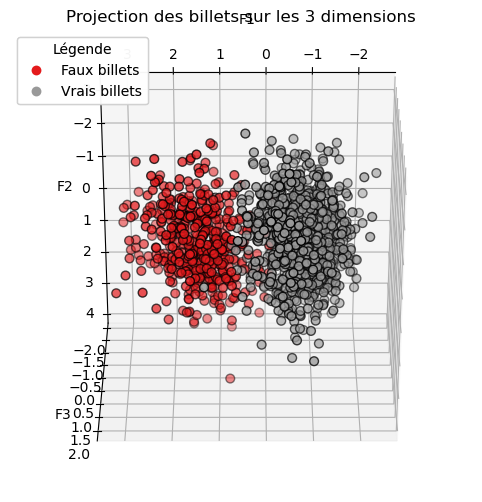

In [35]:
# Avec les 3 dimensions 

fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=120, azim=90)

scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    cmap="Set1", edgecolor="k", s=40, c=df['is_genuine'])

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Faux billets','Vrais billets']], 
                    title='Légende', loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des billets sur les 3 dimensions')

In [36]:
# Graphique des corrélations : fonction 

def correlation_graph(pca, 
                      x_y, 
                      features) :

    
    x,y=x_y    
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

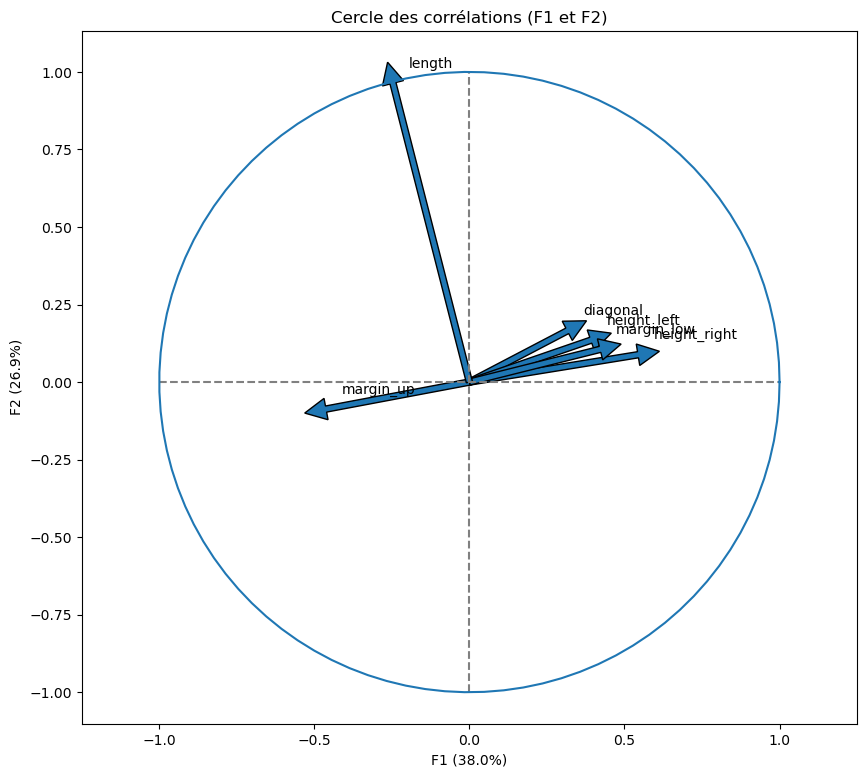

In [37]:
# Utiliser la fonction pour F1 et F2

x_y = (0,1)
x_y
correlation_graph(pca, x_y, features_names)

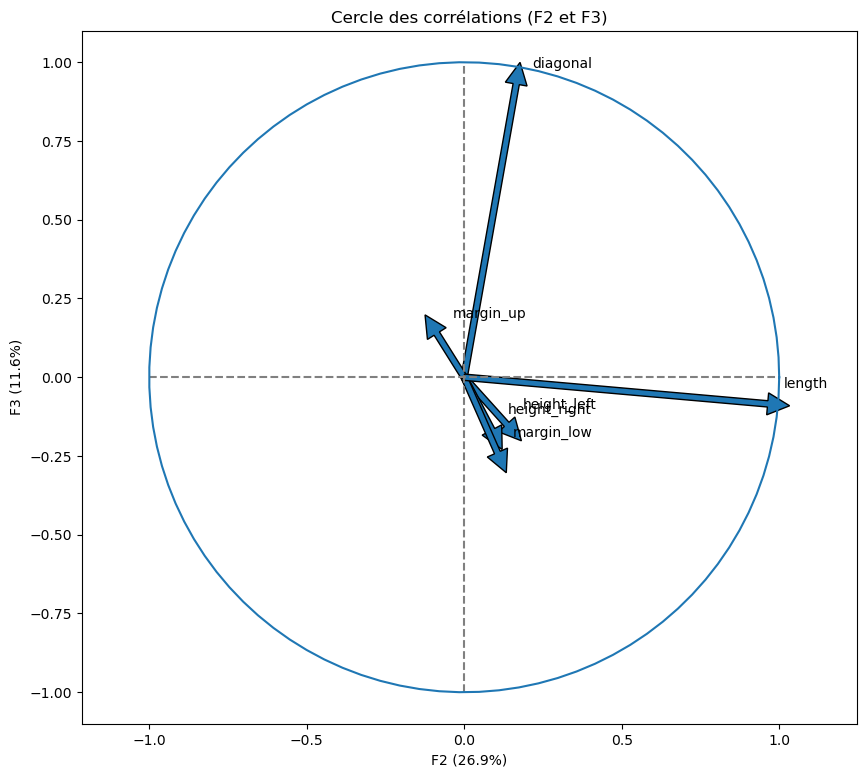

In [38]:
# Utiliser la fonction pour F2 et F3

x_y = (1,2)
x_y
correlation_graph(pca, x_y, features_names)

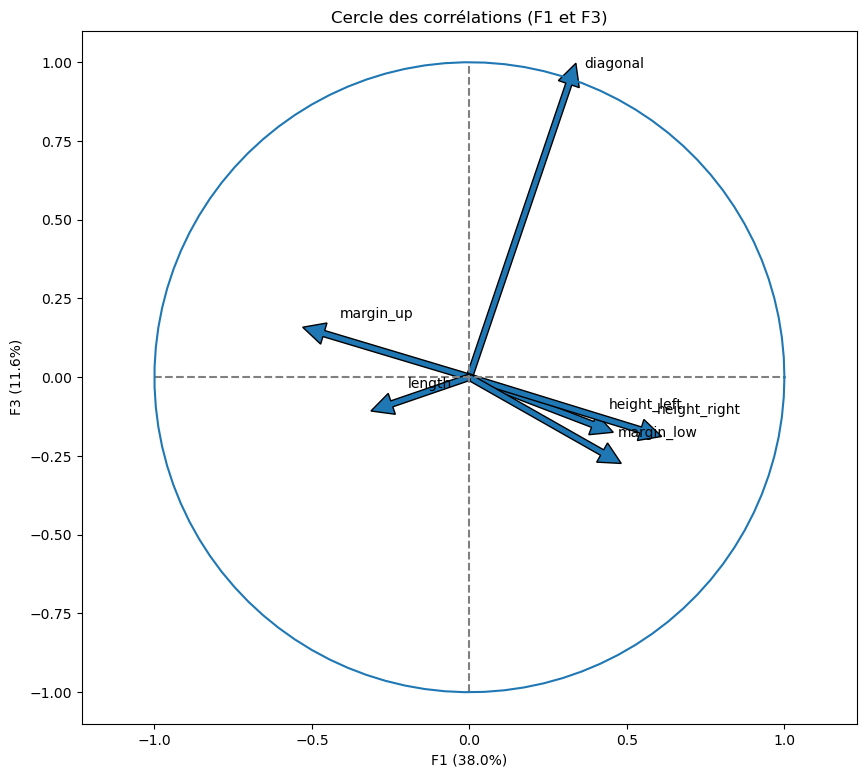

In [39]:
# Utiliser la fonction pour F1 et F3

x_y = (0,2)
correlation_graph(pca, x_y, features_names)

<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Algorithme : méthode des k-means </h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">6.1 - Préparation des données </h3>

In [40]:
# Enregistrement des colonnes et de l'index des données

data = df.copy()
features = data.columns
names = data.index

# Récupération des données sous forme de matrice 

x = data.values 
x.shape

(1500, 7)

In [41]:
x[:10]

array([[  1.  , 171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [  1.  , 171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [  1.  , 172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [  1.  , 171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [  1.  , 171.73, 104.28, 103.46,   4.04,   3.48, 112.54],
       [  1.  , 172.17, 103.74, 104.08,   4.42,   2.95, 112.81],
       [  1.  , 172.34, 104.18, 103.85,   4.58,   3.26, 112.81],
       [  1.  , 171.88, 103.76, 104.08,   3.98,   2.92, 113.08],
       [  1.  , 172.47, 103.92, 103.67,   4.  ,   3.25, 112.85],
       [  1.  , 172.47, 104.07, 104.02,   4.04,   3.25, 113.45]])

In [42]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.483353,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659693,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [43]:
df.var()

is_genuine      0.222370
diagonal        0.093144
height_left     0.089677
height_right    0.106033
margin_low      0.435195
margin_up       0.053737
length          0.761657
dtype: float64

In [44]:
# Ajouter une constante pour l'interception

X = sm.add_constant(data)

In [45]:
# Diviser les données en ensembles d'apprentissage et de test

train, test = train_test_split(X, test_size=0.2, random_state=42)

# Séparation des variables prédictives et de la variable cible
X_train = train.drop('is_genuine', axis=1)
y_train = train['is_genuine']


X_test = test.drop('is_genuine', axis=1)
y_test = test['is_genuine']

In [46]:
X_train.describe()

,const,diagonal,height_left,height_right,margin_low,margin_up,length
count,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.0,171.957067,104.030342,103.919958,4.472792,3.150933,112.690067
std,0.0,0.307434,0.301215,0.326365,0.658308,0.231815,0.879176
min,1.0,171.040000,103.140000,102.820000,2.980000,2.270000,109.490000
25%,1.0,171.750000,103.820000,103.707500,4.010000,2.990000,112.057500
50%,1.0,171.960000,104.040000,103.920000,4.300000,3.130000,112.980000
75%,1.0,172.170000,104.230000,104.150000,4.840000,3.310000,113.350000
max,1.0,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [47]:
# Version données scalées 

data2 = quant_vars.copy()

# Enregistrement de l'index et des colonnes

features_scaled = data2.columns
names_scaled = data2.index

# Normalisation
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data2)
data_scaled = pd.DataFrame(data_scaled, columns=features_scaled)

In [48]:
# Ajout de la colonne catégorielle

data_scaled['is_genuine'] = qual_vars.values

In [49]:
# Vérification intégrité 

# Comparaison des 2 dfs sur la colonne is_genuine

data_scaled['is_genuine'].equals(df['is_genuine'])

True

In [50]:
# Ajouter une constante pour l'interception

X_scaled_const = sm.add_constant(data_scaled)

In [51]:
# Enregistrement de l'index et des colonnes

features_scaled = X_scaled_const.columns
names_scaled = X_scaled_const.index

In [52]:
# Diviser les données en ensembles d'apprentissage et de test

train_scaled, test_scaled = train_test_split(X_scaled_const, test_size=0.2, random_state=42)

# Séparation des variables prédictives et de la variable cible
X_train_scaled = train_scaled.drop('is_genuine', axis=1)
y_train_scaled = train_scaled['is_genuine']


X_test_scaled = test_scaled.drop('is_genuine', axis=1)
y_test_scaled = test_scaled['is_genuine']

In [53]:
X_train_scaled.describe()

,const,diagonal,height_left,height_right,margin_low,margin_up,length
count,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.0,-0.004501,0.002700,-0.001070,-0.016015,-0.002330,0.013258
std,0.0,1.007672,1.006190,1.002601,0.998234,1.000344,1.007722
min,1.0,-3.010357,-2.971432,-3.380166,-2.279627,-3.803785,-3.654697
25%,1.0,-0.683201,-0.699933,-0.653747,-0.717775,-0.696799,-0.711798
50%,1.0,0.005113,0.034963,-0.000942,-0.278030,-0.092663,0.345583
75%,1.0,0.693427,0.669647,0.705623,0.540805,0.684084,0.769681
max,1.0,3.446683,2.840932,3.163240,3.664510,3.273239,1.881507


In [54]:
X_train_scaled

,const,diagonal,height_left,height_right,margin_low,margin_up,length
382,1.0,1.053972,1.972418,-0.369585,-0.611629,-0.308426,0.666522
538,1.0,-0.191548,1.571565,-1.321911,-0.611629,-1.430393,0.941613
1493,1.0,-1.076523,1.003691,2.118753,0.601460,0.856694,-0.594311
1112,1.0,0.332882,0.836669,1.197146,1.708404,0.511473,-1.224728
324,1.0,0.463989,1.304330,-0.983989,-0.459993,-1.128325,0.735295
...,...,...,...,...,...,...,...
1130,1.0,-1.305961,0.870073,0.828504,1.132186,2.064966,0.299734
1294,1.0,1.447295,0.803264,0.797784,0.662114,0.079947,-1.018409
860,1.0,-1.895944,-0.666529,0.214099,-0.065739,-0.135816,0.918689
1459,1.0,-0.584870,0.936882,-0.308144,2.587893,0.425168,-1.763447


In [55]:
# Version sans ouliers

# Enregistrement des colonnes et de l'index des données

data3 = df_ss_outliers.copy()
features3 = data3.columns
names3 = data3.index

# Récupération des données sous forme de matrice 

x_cleaned = data3.values 
x_cleaned.shape

(1454, 7)

In [56]:
x_cleaned[:10]

array([[  1.  , 171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [  1.  , 172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [  1.  , 171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [  1.  , 171.73, 104.28, 103.46,   4.04,   3.48, 112.54],
       [  1.  , 172.17, 103.74, 104.08,   4.42,   2.95, 112.81],
       [  1.  , 172.34, 104.18, 103.85,   4.58,   3.26, 112.81],
       [  1.  , 171.88, 103.76, 104.08,   3.98,   2.92, 113.08],
       [  1.  , 172.47, 103.92, 103.67,   4.  ,   3.25, 112.85],
       [  1.  , 172.47, 104.07, 104.02,   4.04,   3.25, 113.45],
       [  1.  , 171.84, 104.59, 104.  ,   3.88,   3.27, 113.08]])

In [57]:
data3.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,0.669188,171.959106,104.027208,103.917834,4.480309,3.150131,112.684402
std,0.470667,0.298831,0.293971,0.318999,0.651634,0.228596,0.861098
min,0.000000,171.130000,103.200000,102.820000,3.260000,2.560000,109.970000
25%,0.000000,171.750000,103.820000,103.702500,4.020000,2.990000,112.042500
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,1.000000,172.170000,104.230000,104.140000,4.860000,3.310000,113.337500
max,1.000000,172.760000,104.760000,104.870000,6.700000,3.810000,114.440000


In [58]:
data3.var()

is_genuine      0.221528
diagonal        0.089300
height_left     0.086419
height_right    0.101761
margin_low      0.424627
margin_up       0.052256
length          0.741489
dtype: float64

In [59]:
# Ajouter une constante pour l'interception

X_cleaned = sm.add_constant(data3)

In [60]:
# Diviser les données en ensembles d'apprentissage et de test

train_cleaned, test_cleaned = train_test_split(X_cleaned, test_size=0.2, random_state=42)

# Séparation des variables prédictives et de la variable cible
X_train_cleaned = train_cleaned.drop('is_genuine', axis=1)
y_train_cleaned = train_cleaned['is_genuine']


X_test_cleaned = test_cleaned.drop('is_genuine', axis=1)
y_test_cleaned = test_cleaned['is_genuine']

In [61]:
X_train_cleaned.describe()

,const,diagonal,height_left,height_right,margin_low,margin_up,length
count,1163.0,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000
mean,1.0,171.954213,104.026543,103.911608,4.468306,3.151599,112.690679
std,0.0,0.298508,0.292478,0.319368,0.652539,0.228881,0.866525
min,1.0,171.150000,103.220000,102.820000,3.260000,2.560000,109.970000
25%,1.0,171.750000,103.815000,103.700000,4.005000,2.990000,112.060000
50%,1.0,171.950000,104.040000,103.910000,4.290000,3.140000,112.970000
75%,1.0,172.160000,104.230000,104.140000,4.840000,3.310000,113.350000
max,1.0,172.760000,104.760000,104.870000,6.700000,3.810000,114.440000


<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">6.2 - K-means sur l'ensemble des données non normalisées </h3>

In [62]:
kmeans = KMeans()

In [63]:
# Séparation des variables prédictives et de la variable cible
X_train = train.drop(['const','is_genuine'], axis=1)
y_train = train['is_genuine']


X_test = test.drop(['const','is_genuine'], axis=1)
y_test = test['is_genuine']

In [64]:
# Conversion en matrices

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [65]:
X_train.shape

(1200, 6)

In [66]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(X_train, kmeanModel.labels_))

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

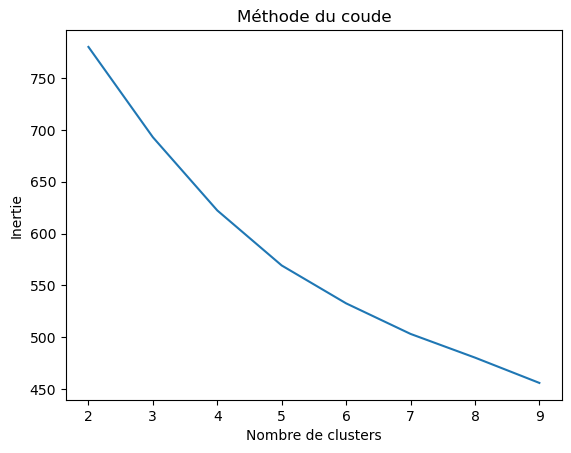

In [67]:
# Graphique de la méthode du coude

plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

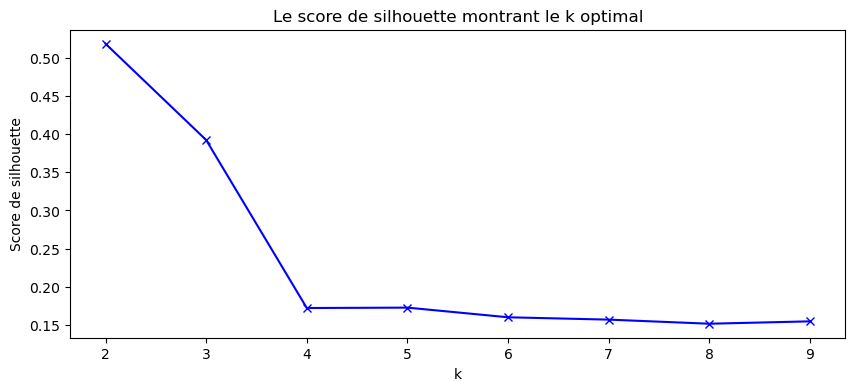

In [68]:
# Graphique du score de silhouette

plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

2 clusters semblent le choix le plus approprié, d'autant plus que l'on souhaite regrouper et prédire
les vrais et les faux billets.

Nous devrons tout d'abord vérifier à quoi correspondent ces deux clusters

In [69]:
# Choix de 2 clusters

kmeans = KMeans(n_clusters=2)
model = kmeans.fit(X_train)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [70]:
# Calcul de l'inertie pour comparer

print(model.inertia_)

779.8923540668247


In [71]:
# Affichage des centroïdes 

print(model.cluster_centers_)

[[171.9826699  103.95635922 103.81609223   4.12394417   3.05946602
  113.20385922]
 [171.90095745 104.1924734  104.14757979   5.23728723   3.35138298
  111.56409574]]


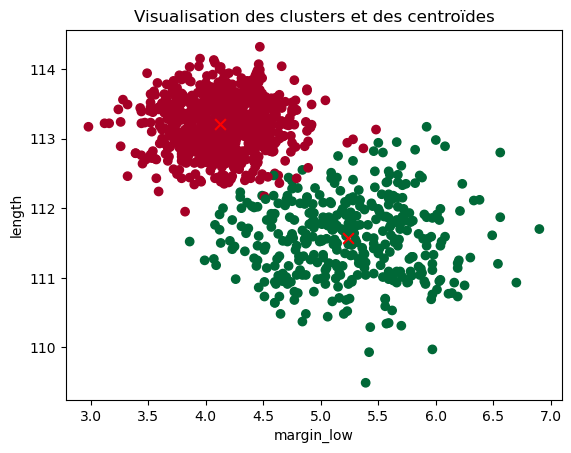

In [72]:
# Visualisation

labels = model.labels_

plt.scatter(X_train[:, 3], X_train[:, 5], c=labels, cmap='RdYlGn')
plt.scatter(model.cluster_centers_[:, 3], model.cluster_centers_[:, 5], marker='x', c='red', s=60)
plt.xlabel('margin_low')
plt.ylabel('length')
plt.title('Visualisation des clusters et des centroïdes')

plt.show()

In [73]:
# 2eme test

kmeans = KMeans(n_clusters=2)
model2 = kmeans.fit(X_train)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [74]:
# Calcul de l'inertie pour comparer

print(model2.inertia_)

779.8923540668247


In [75]:
# Affichage des centroïdes 

print(model2.cluster_centers_)

[[171.9826699  103.95635922 103.81609223   4.12394417   3.05946602
  113.20385922]
 [171.90095745 104.1924734  104.14757979   5.23728723   3.35138298
  111.56409574]]


In [76]:
# Ajouter les clusters aux données initiales 

df_kmeans = train.drop('const', axis=1).copy()
df_kmeans['cluster_kmeans'] = kmeans.labels_
df_kmeans

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_kmeans
382,1,172.28,104.62,103.80,4.08,3.08,113.26,0
538,1,171.90,104.50,103.49,4.08,2.82,113.50,0
1493,0,171.63,104.33,104.61,4.88,3.35,112.16,1
1112,0,172.06,104.28,104.31,5.61,3.27,111.61,1
324,1,172.10,104.42,103.60,4.18,2.89,113.32,0
...,...,...,...,...,...,...,...,...
1130,0,171.56,104.29,104.19,5.23,3.63,112.94,0
1294,0,172.40,104.27,104.18,4.92,3.17,111.79,1
860,1,171.38,103.83,103.99,4.44,3.12,113.48,0
1459,0,171.78,104.31,103.82,6.19,3.25,111.14,1


In [77]:
# Affichage des stats des centroïdes des clusters

cluster_KM_stats = df_kmeans.groupby('cluster_kmeans')[df_kmeans.columns].mean()
cluster_KM_stats['value_counts'] = pd.crosstab(df_kmeans['cluster_kmeans'], columns= 'value_counts')
cluster_KM_stats = cluster_KM_stats.drop(['is_genuine', 'cluster_kmeans'], axis=1)
cluster_KM_stats

,diagonal,height_left,height_right,margin_low,margin_up,length,value_counts
cluster_kmeans,,,,,,,
0,171.982670,103.956359,103.816092,4.123944,3.059466,113.203859,824
1,171.900957,104.192473,104.147580,5.237287,3.351383,111.564096,376


In [78]:
# Comparaison avec les moyennes par type de billet

mean_stats = df_kmeans.groupby('is_genuine')[df_kmeans.columns].mean()
mean_stats['value_counts'] = pd.crosstab(df_kmeans['is_genuine'], columns= 'value_counts')
mean_stats = mean_stats.drop(['is_genuine', 'cluster_kmeans'], axis=1)
mean_stats

,diagonal,height_left,height_right,margin_low,margin_up,length,value_counts
is_genuine,,,,,,,
0,171.903154,104.190026,104.146538,5.213462,3.353000,111.608154,390
1,171.983025,103.953457,103.810864,4.116173,3.053642,113.210988,810


Rappel : 
- is_genuine = 0 -> faux billets
- is_genuine = 1 -> vrais billets   

Les moyennes de notre cluster 0 se rapprochent fortement aux moyennes des vrais billets, tandis que celles de notre cluster 1 se rapprochent de celles des faux. (ordre pouvant varier)
Notre cluster 0 correspond donc aux vrais billets et notre cluster 1 aux faux.

Malgré 14 erreurs de classement, nos centroïdes se rapprochent fortement des moyennes de type de billets.

Nous pouvons regarder plus en détails les distributions des individus et des variables au sein des clusters et les comparer avec les types de billets 

In [79]:
# Calcul du taux d'erreur de classification sur la base du train

CE = (1/df_kmeans.shape[0])*sum(df_kmeans['is_genuine']==df_kmeans['cluster_kmeans'])
CE

0.015000000000000001

diagonal


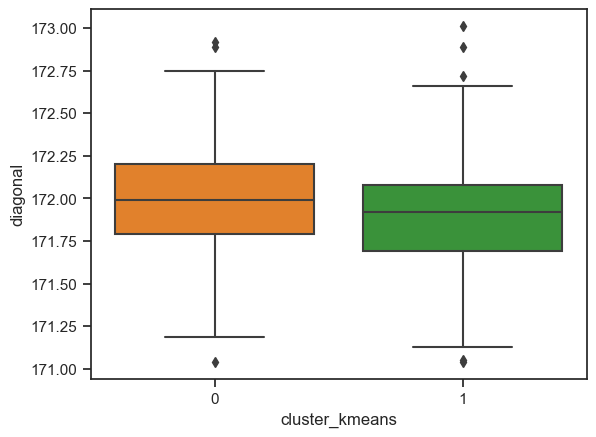

height_left


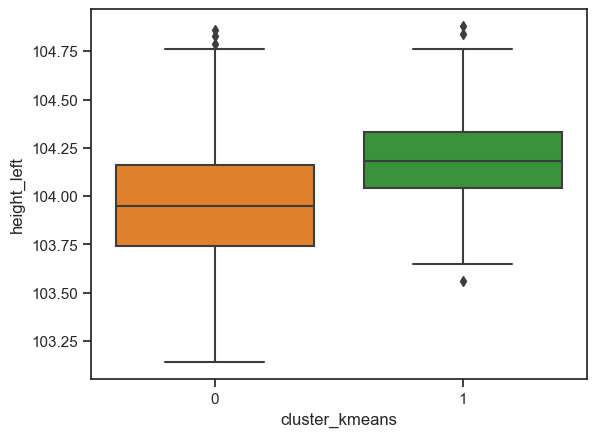

height_right


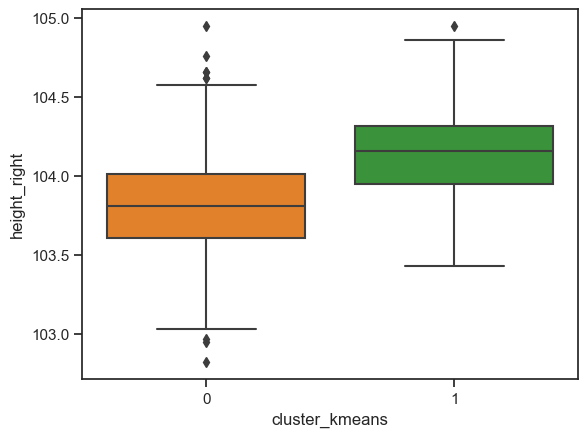

margin_low


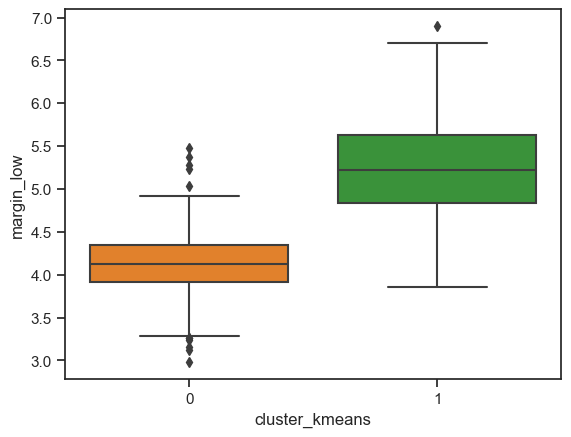

margin_up


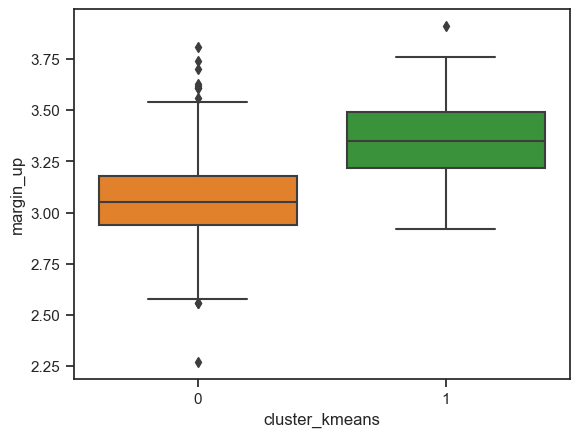

length


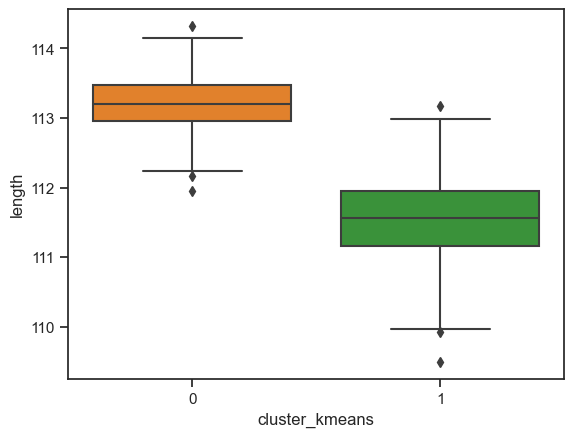

In [80]:
# Sélection des variables quantitatives
quant_vars = df_kmeans.select_dtypes(include=['float64'])

# Tracé des boxplots pour chaque variable
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(x='cluster_kmeans', y=var, data=df_kmeans, palette=my_palette)
    plt.show()

diagonal


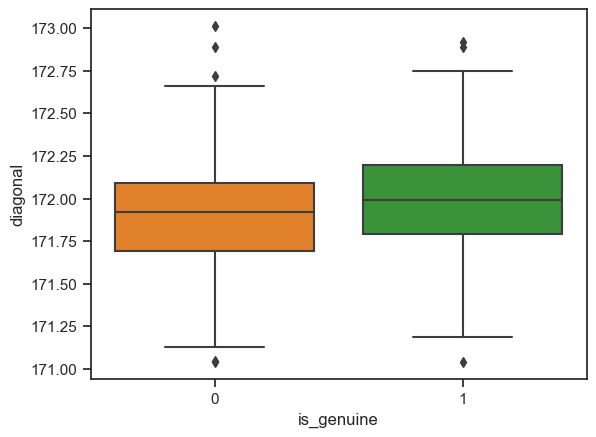

height_left


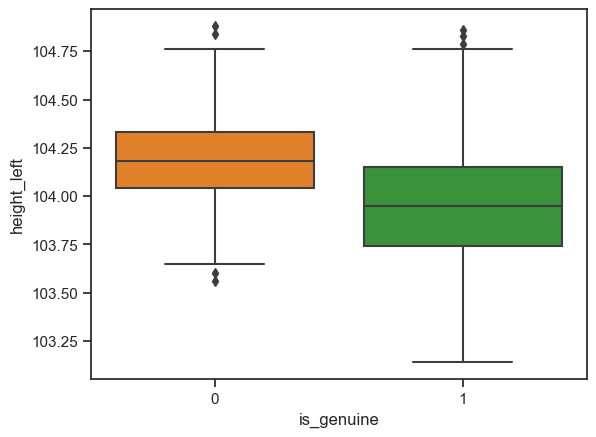

height_right


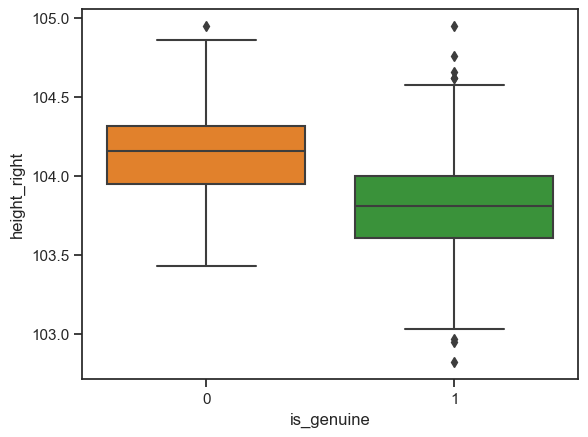

margin_low


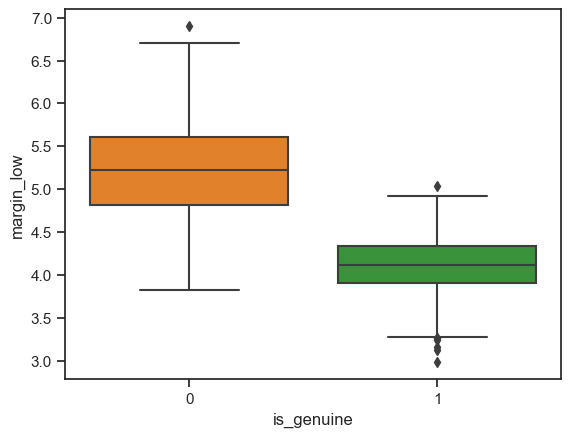

margin_up


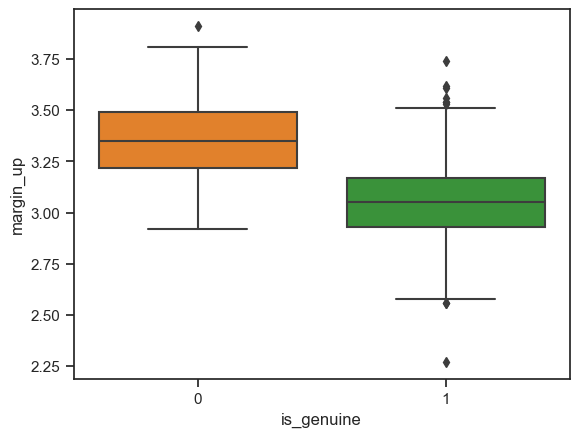

length


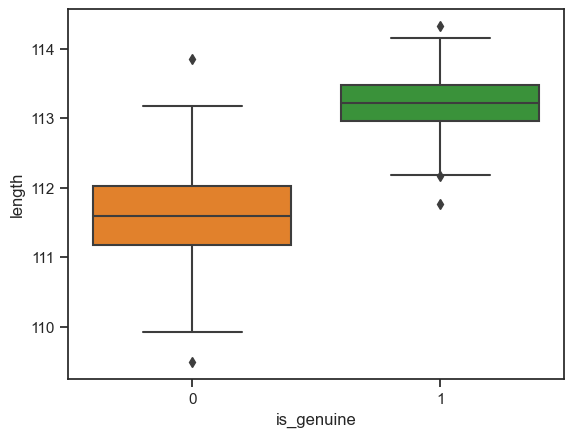

In [81]:
# Comparaison avec vrais / faux billets

# Tracé des boxplots pour chaque variable
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(x='is_genuine', y=var, data=df_kmeans, palette=my_palette)
    plt.show()

In [82]:
# Obtentions des prédictions sur le test

predictions = model.predict(X_test)
predictions = np.where(predictions == 0, 1, 0)

[[104   6]
 [  0 190]]
Score du modèle k-means: -192.63778291088022


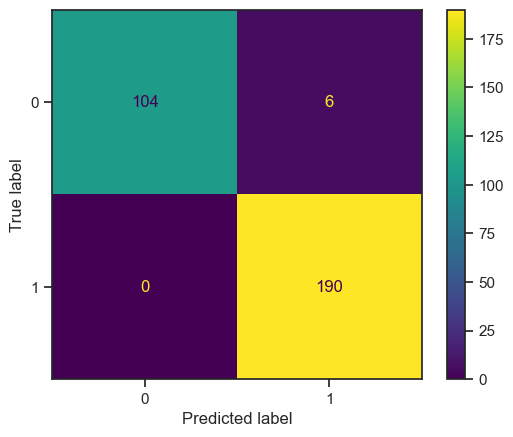

In [83]:
# Matrice de confusion

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

score = model.score(X_test, y_test)
print('Score du modèle k-means:',score)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                         
disp.plot()
plt.show()

6 faux positifs ici, c'est à dire que le modèle a prédit 6 faux billets comme étant vrais, ce qui n'est vraiment pas ce que l'on recherche

In [84]:
# Calcul du taux d'erreur de classification

CE = (1/X_test.shape[0])*sum(y_test!=predictions)
CE

0.9800000000000001

In [85]:
# Générer le rapport de classification
report = classification_report(y_test, predictions)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       110
           1       0.97      1.00      0.98       190

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300



<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">6.3 - Sur l'ensemble des variables normalisées </h3>

In [86]:
# Séparation des variables prédictives et de la variable cible
X_train_scaled = train_scaled.drop(['is_genuine','const'], axis=1)
y_train_scaled = train_scaled['is_genuine']


X_test_scaled = test_scaled.drop(['is_genuine','const'], axis=1)
y_test_scaled = test_scaled['is_genuine']

In [87]:
# Conversion en matrices

X_train_scaled = X_train_scaled.values
y_train_scaled = y_train_scaled.values
X_test_scaled = X_test_scaled.values
y_test_scaled = y_test_scaled.values

In [88]:
X_train_scaled.shape

(1200, 6)

In [89]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_scaled)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(X_train_scaled, kmeanModel.labels_))

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

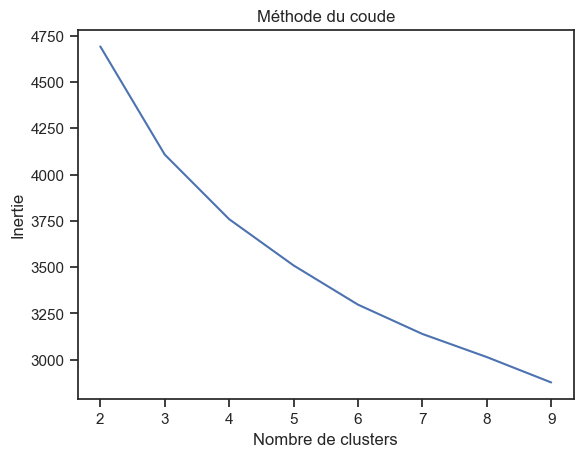

In [90]:
# Graphique de la méthode du coude

plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

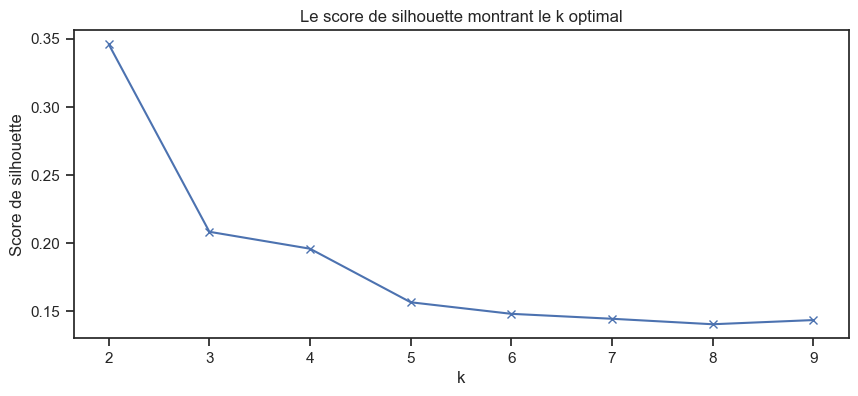

In [91]:
# Graphique du score de silhouette

plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

Le choix de 2 clusters reste le choix le plus optimal

In [92]:
# Choix de 2 clusters

kmeans = KMeans(n_clusters=2)
model_scaled = kmeans.fit(X_train_scaled)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [93]:
# Calcul de l'inertie pour comparer

print(model_scaled.inertia_)

4691.088344568785


In [94]:
# Affichage des centroïdes 

print(model_scaled.cluster_centers_)

[[-0.19627948  0.56241946  0.72828011  1.13397725  0.88398986 -1.24834385]
 [ 0.08471411 -0.25768204 -0.34036487 -0.55099353 -0.41464765  0.60015681]]


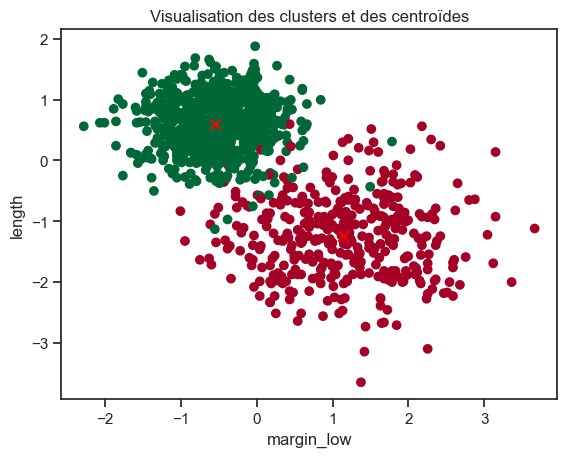

In [95]:
# Visualisation

labels = model_scaled.labels_

plt.scatter(X_train_scaled[:, 3], X_train_scaled[:, 5], c=labels, cmap='RdYlGn')
plt.scatter(model_scaled.cluster_centers_[:, 3], model_scaled.cluster_centers_[:, 5], marker='x', c='red', s=60)
plt.xlabel('margin_low')
plt.ylabel('length')
plt.title('Visualisation des clusters et des centroïdes')

plt.show()

In [96]:
# 2eme test

kmeans = KMeans(n_clusters=2)
model_scaled2 = kmeans.fit(X_train_scaled)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [97]:
# Calcul de l'inertie pour comparer

print(model_scaled2.inertia_)

4691.088344568785


In [98]:
# Affichage des centroïdes 

print(model_scaled2.cluster_centers_)

[[ 0.08471411 -0.25768204 -0.34036487 -0.55099353 -0.41464765  0.60015681]
 [-0.19627948  0.56241946  0.72828011  1.13397725  0.88398986 -1.24834385]]


In [99]:
# Ajouter les clusters aux données initiales 

df_scaled_kmeans = train_scaled.drop('const', axis=1).copy()
df_scaled_kmeans['cluster_kmeans'] = model_scaled.labels_
df_scaled_kmeans

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,cluster_kmeans
382,1.053972,1.972418,-0.369585,-0.611629,-0.308426,0.666522,1,1
538,-0.191548,1.571565,-1.321911,-0.611629,-1.430393,0.941613,1,1
1493,-1.076523,1.003691,2.118753,0.601460,0.856694,-0.594311,0,0
1112,0.332882,0.836669,1.197146,1.708404,0.511473,-1.224728,0,0
324,0.463989,1.304330,-0.983989,-0.459993,-1.128325,0.735295,1,1
...,...,...,...,...,...,...,...,...
1130,-1.305961,0.870073,0.828504,1.132186,2.064966,0.299734,0,0
1294,1.447295,0.803264,0.797784,0.662114,0.079947,-1.018409,0,0
860,-1.895944,-0.666529,0.214099,-0.065739,-0.135816,0.918689,1,1
1459,-0.584870,0.936882,-0.308144,2.587893,0.425168,-1.763447,0,0


In [100]:
# Affichage des stats des centroïdes des clusters

cluster_KM_stats_sc = df_scaled_kmeans.groupby('cluster_kmeans')[df_scaled_kmeans.columns].mean()
cluster_KM_stats_sc['value_counts'] = pd.crosstab(df_scaled_kmeans['cluster_kmeans'], columns= 'value_counts')
cluster_KM_stats_sc = cluster_KM_stats_sc.drop(['is_genuine', 'cluster_kmeans'], axis=1)
cluster_KM_stats_sc

,diagonal,height_left,height_right,margin_low,margin_up,length,value_counts
cluster_kmeans,,,,,,,
0,-0.196279,0.562419,0.728280,1.133977,0.883990,-1.248344,381
1,0.084714,-0.257682,-0.340365,-0.550994,-0.414648,0.600157,819


In [101]:
# Comparaison avec les moyennes par type de billet

mean_stats_sc = df_scaled_kmeans.groupby('is_genuine')[df_scaled_kmeans.columns].mean()
mean_stats_sc['value_counts'] = pd.crosstab(df_scaled_kmeans['is_genuine'], columns= 'value_counts')
mean_stats_sc = mean_stats_sc.drop(['is_genuine', 'cluster_kmeans'], axis=1)
mean_stats_sc

,diagonal,height_left,height_right,margin_low,margin_up,length,value_counts
is_genuine,,,,,,,
0,-0.181211,0.536115,0.694989,1.107108,0.869640,-1.226844,390
1,0.080581,-0.254129,-0.336210,-0.556778,-0.422168,0.610344,810


Notre cluster 0 correspond aux faux billets et notre cluster 1 aux vrais (ordre pouvant varier)

On compte 9 erreurs de classes sur la base d'entraînement

In [102]:
# Calcul du taux d'erreur de classification sur la base du train

CE = (1/df_scaled_kmeans.shape[0])*sum(df_scaled_kmeans['is_genuine']!=df_scaled_kmeans['cluster_kmeans'])
CE

0.014166666666666668

diagonal


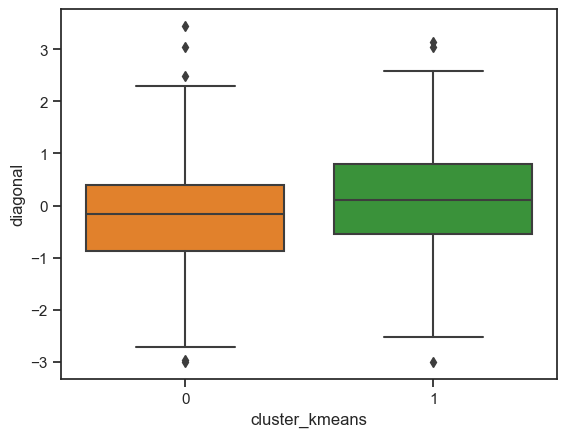

height_left


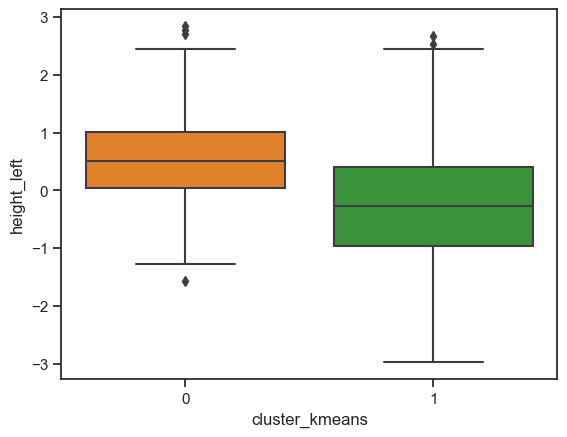

height_right


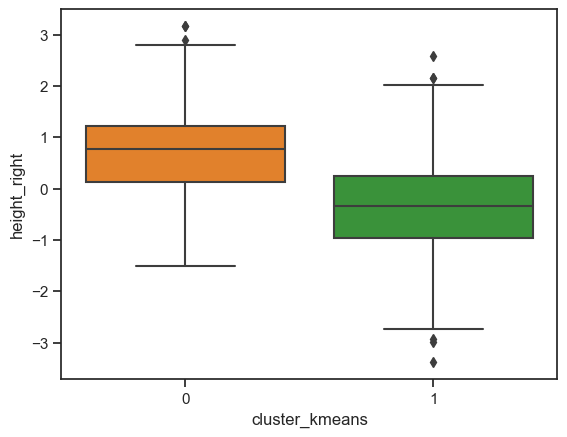

margin_low


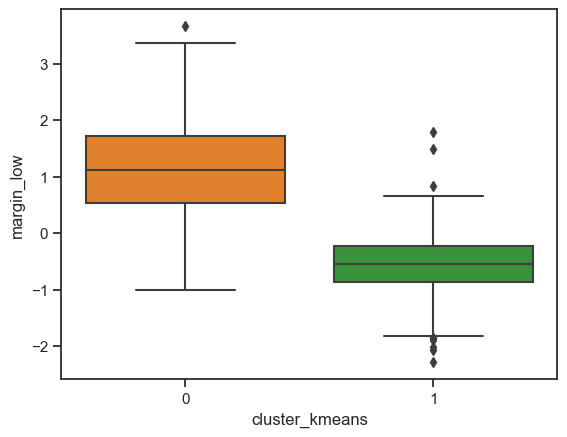

margin_up


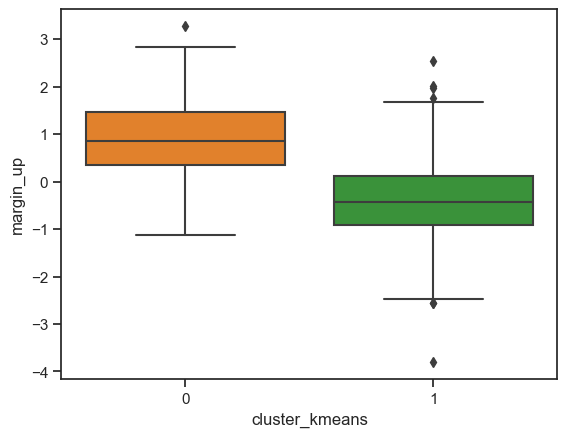

length


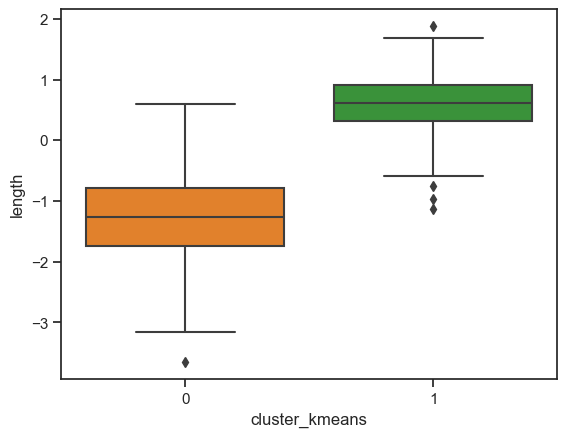

In [103]:
# Sélection des variables quantitatives
quant_vars = df_scaled_kmeans.select_dtypes(include=['float64'])

# Tracé des boxplots pour chaque variable
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(x='cluster_kmeans', y=var, data=df_scaled_kmeans, palette=my_palette)
    plt.show()

diagonal


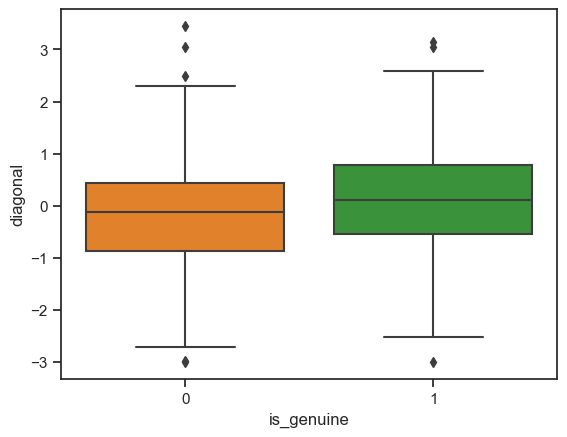

height_left


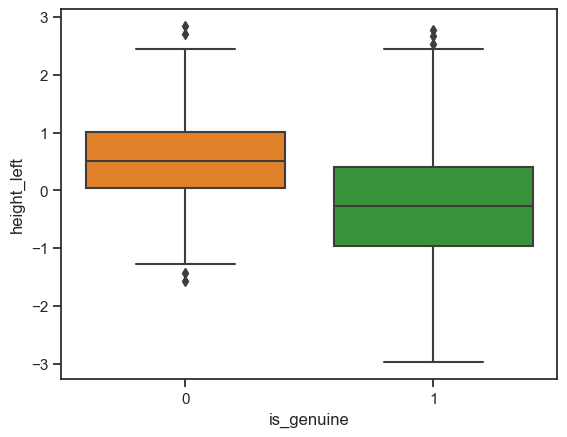

height_right


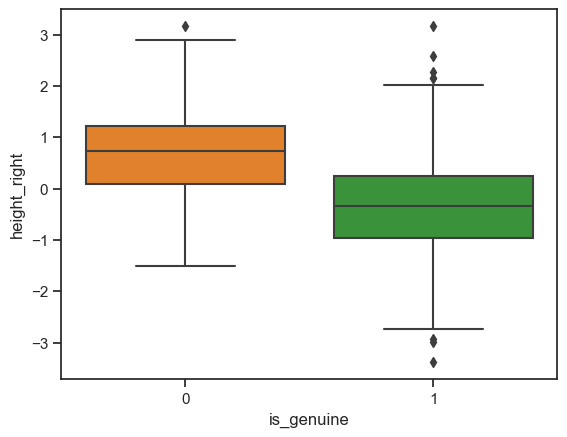

margin_low


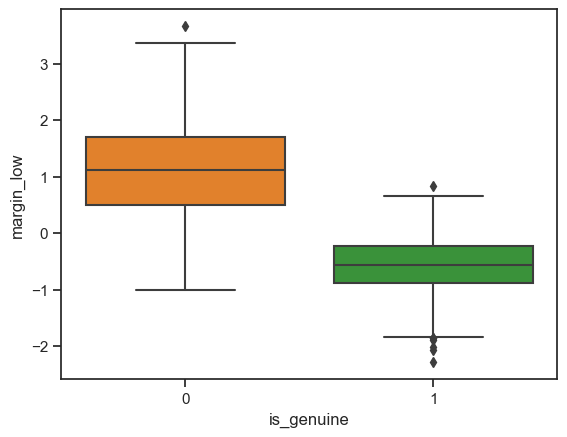

margin_up


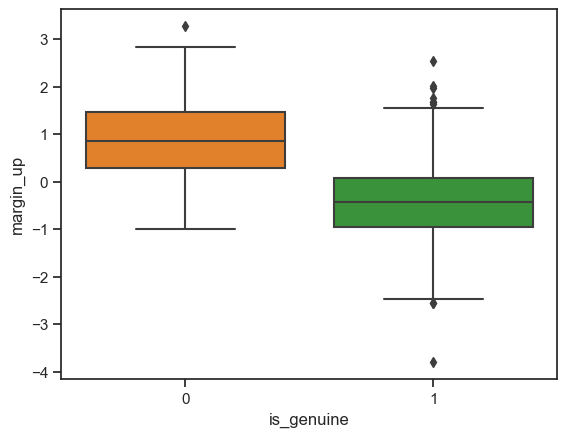

length


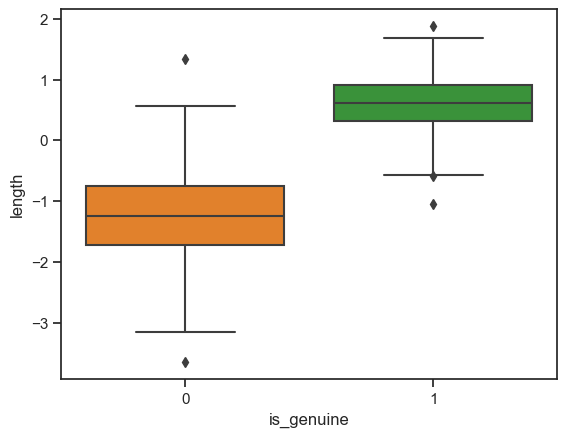

In [104]:
# Comparaison avec vrais / faux billets

# Tracé des boxplots pour chaque variable
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(x='is_genuine', y=var, data=df_scaled_kmeans, palette=my_palette)
    plt.show()

In [105]:
predictions = model_scaled.predict(X_test_scaled)
predictions = np.where(predictions == 0, 0, 1)

[[109   1]
 [  2 188]]
Score du modèle k-means: -1116.1251555562505


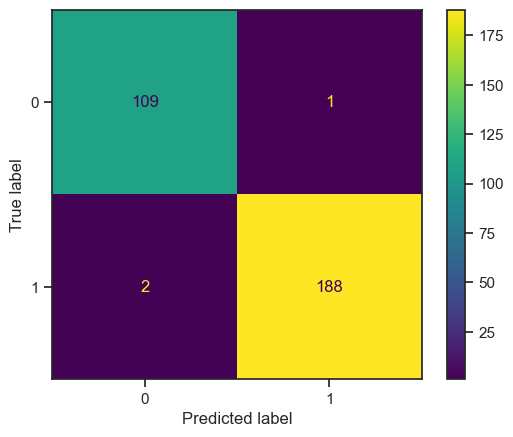

In [106]:
cm = metrics.confusion_matrix(y_test_scaled, predictions)
print(cm)

score = model_scaled.score(X_test_scaled, y_test_scaled)
print('Score du modèle k-means:',score)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                         
disp.plot()
plt.show()

1 faux positif pour 2 faux négatifs, donc 1 faux billet a été prédit comme vrai et 2 vrais billets ont été prédits comme faux

In [107]:
# Calcul du taux d'erreur de classification sur la base du test

CE = (1/X_test_scaled.shape[0])*sum(y_test_scaled!=predictions)
CE

0.01

In [108]:
# Générer le rapport de classification
report = classification_report(y_test_scaled, predictions)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">6.4 - Sur l'ensemble des variables "nettoyées" </h3>

In [109]:
# Séparation des variables prédictives et de la variable cible
X_train_cleaned = train_cleaned.drop(['const','is_genuine'], axis=1)
y_train_cleaned = train_cleaned['is_genuine']

X_test_cleaned = test_cleaned.drop(['const','is_genuine'], axis=1)
y_test_cleaned = test_cleaned['is_genuine']

In [110]:
# Conversion en matrices

X_train_cleaned = X_train_cleaned.values
y_train_cleaned = y_train_cleaned.values
X_test_cleaned = X_test_cleaned.values
y_test_cleaned = y_test_cleaned.values

In [111]:
X_train_cleaned.shape

(1163, 6)

In [112]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_cleaned)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(X_train_cleaned, kmeanModel.labels_))

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

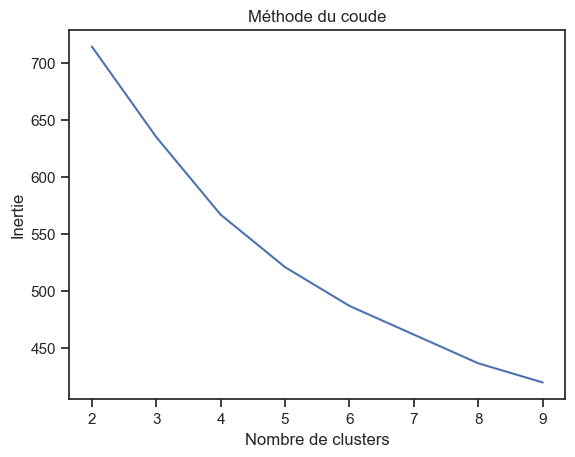

In [113]:
# Graphique de la méthode du coude

plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

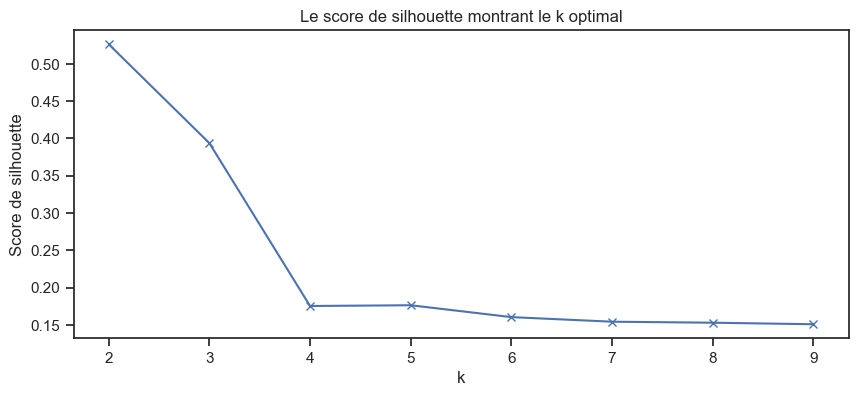

In [114]:
# Graphique du score de silhouette

plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

2 clusters semblent toujours le choix le plus judicieux

In [115]:
# Choix de 2 clusters

kmeans = KMeans(n_clusters=2)
model_cleaned = kmeans.fit(X_train_cleaned)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [116]:
# Calcul de l'inertie pour comparer

print(model_cleaned.inertia_)

714.2523148344512


In [117]:
# Affichage des centroïdes 

print(model_cleaned.cluster_centers_)

[[171.97840399 103.95058603 103.80584788   4.11857855   3.0644389
  113.19395262]
 [171.90047091 104.19529086 104.1465651    5.24526316   3.34523546
  111.57260388]]


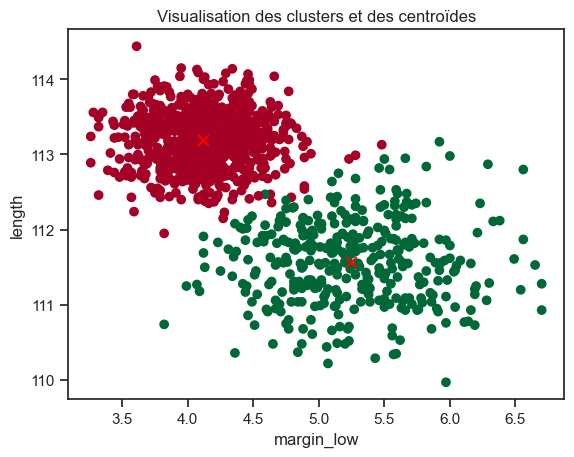

In [118]:
# Visualisation

labels = model_cleaned.labels_

plt.scatter(X_train_cleaned[:, 3], X_train_cleaned[:, 5], c=labels, cmap='RdYlGn')
plt.scatter(model_cleaned.cluster_centers_[:, 3], model_cleaned.cluster_centers_[:, 5], marker='x', c='red', s=60)
plt.xlabel('margin_low')
plt.ylabel('length')
plt.title('Visualisation des clusters et des centroïdes')

plt.show()

In [119]:
# 2eme test

kmeans = KMeans(n_clusters=2)
model_cleaned2 = kmeans.fit(X_train_cleaned)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [120]:
# Calcul de l'inertie pour comparer

print(model_cleaned2.inertia_)

714.2523148344512


In [121]:
# Affichage des centroïdes 

print(model_cleaned2.cluster_centers_)

[[171.97840399 103.95058603 103.80584788   4.11857855   3.0644389
  113.19395262]
 [171.90047091 104.19529086 104.1465651    5.24526316   3.34523546
  111.57260388]]


In [122]:
# Ajouter les clusters aux données initiales 

df_kmeans_cleaned = train_cleaned.drop('const', axis=1).copy()
df_kmeans_cleaned['cluster_kmeans'] = kmeans.labels_
df_kmeans_cleaned

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_kmeans
737,1,172.16,104.39,103.85,3.77,3.32,112.55,0
260,1,172.27,103.71,103.64,4.64,2.67,113.63,0
1164,0,171.50,104.52,104.19,4.84,3.12,110.37,1
649,1,171.59,104.06,103.99,3.93,3.24,112.80,0
1329,0,172.50,104.07,103.71,3.82,3.63,110.74,1
...,...,...,...,...,...,...,...,...
1129,0,171.68,104.04,104.68,5.32,3.56,111.04,1
1166,0,171.89,104.23,104.52,4.60,3.15,110.94,1
1335,0,172.04,104.17,103.90,5.05,3.62,111.56,1
881,1,171.54,104.36,103.83,3.86,3.06,112.92,0


In [123]:
# Affichage des stats des centroïdes des clusters

cluster_KM_stats3 = df_kmeans_cleaned.groupby('cluster_kmeans')[df_kmeans_cleaned.columns].mean()
cluster_KM_stats3['value_counts'] = pd.crosstab(df_kmeans_cleaned['cluster_kmeans'], columns= 'value_counts')
cluster_KM_stats3 = cluster_KM_stats3.drop(['is_genuine', 'cluster_kmeans'], axis=1)
cluster_KM_stats3

,diagonal,height_left,height_right,margin_low,margin_up,length,value_counts
cluster_kmeans,,,,,,,
0,171.978404,103.950586,103.805848,4.118579,3.064439,113.193953,802
1,171.900471,104.195291,104.146565,5.245263,3.345235,111.572604,361


In [124]:
# Comparaison avec les moyennes par type de billet

cluster_KM_stats4 = df_kmeans_cleaned.groupby('is_genuine')[df_kmeans_cleaned.columns].mean()
cluster_KM_stats4['value_counts'] = pd.crosstab(df_kmeans_cleaned['is_genuine'], columns= 'value_counts')
cluster_KM_stats4 = cluster_KM_stats4.drop(['is_genuine', 'cluster_kmeans'], axis=1)
cluster_KM_stats4

,diagonal,height_left,height_right,margin_low,margin_up,length,value_counts
is_genuine,,,,,,,
0,171.901398,104.192586,104.143166,5.210237,3.348734,111.621003,379
1,171.979745,103.946276,103.799668,4.109643,3.056301,113.207781,784


Le cluster 0 correspond cette fois au groupe des vrais billets et le cluster 1 à celui des faux. (ordre pouvant varier)

Avoir retiré les outliers a eu un effet négatif : les erreurs de classes sont maintenant de 18.
Les outliers étant en majorité des vrais billets, le modèle a visiblement moins appris.

Je décide donc de conserver l'intégralité des données pour la suite, le modèle final n'en sera que plus robuste et pourra plus facilement s'adapter en situation réelle.

Testons tout de même les prédictions de ce modèle.

In [125]:
# Calcul du taux d'erreur de classification sur la base du train

CE = (1/df_kmeans_cleaned.shape[0])*sum(df_kmeans_cleaned['is_genuine']==df_kmeans_cleaned['cluster_kmeans'])
CE

0.015477214101461738

In [126]:
predictions = model_cleaned.predict(X_test_cleaned)
predictions = np.where(predictions == 0, 1, 0)

[[101   1]
 [  0 189]]
Score du modèle k-means: -186.40943765442614


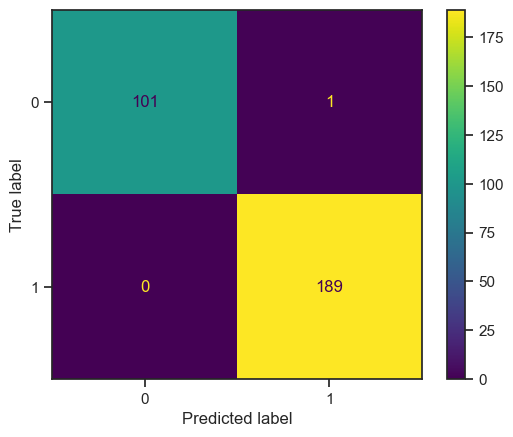

In [127]:
cm = metrics.confusion_matrix(y_test_cleaned, predictions)
print(cm)

score = model_cleaned.score(X_test_cleaned, predictions)
print('Score du modèle k-means:',score)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                         
disp.plot()
plt.show()

1 faux positif malgré tout, donc un faux billet a été prédit comme vrai 

Sans oublier que la base de test était de 291 billets, contrairement aux autre modèles où la base de test était de 300

In [128]:
# Calcul du taux d'erreur de classification sur la base du test

CE = (1/X_test_cleaned.shape[0])*sum(y_test_cleaned!=predictions)
CE

0.003436426116838488

In [129]:
# Générer le rapport de classification
report = classification_report(y_test_cleaned, predictions)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      1.00       189

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Algorithme : méthode par la régression logistique </h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.1 - Sur l'ensemble des variables non scalées </h3>

In [130]:
# Séparation des variables prédictives et de la variable cible
X_train = train.drop(['is_genuine'], axis=1)
y_train = train['is_genuine']


X_test = test.drop(['is_genuine'], axis=1)
y_test = test['is_genuine']

In [131]:
# Créer le modèle de régression logistique

logit_model = sm.Logit(y_train, X_train)

In [132]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.030469
         Iterations 13


In [133]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.9517
Time:                        18:32:57   Log-Likelihood:                -36.563
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                4.619e-308
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -83.9258    257.673     -0.326      0.745    -588.957     421.105
diagonal        -0.3890      1.151     -0.338      0.735      -2.646       1.868
height_left     -1.8596      1.276     -1.45

**Les variables suivantes sont statistiquement significatives : (coeff statistiquement différents de 0 avec p-valeur < 0.05)**

- height_right
- margin_low
- margin_up
- length

Ce qui confirme à nouveau les tests statistiques réalisés précédemment, ces variables sont suffisamment différentes entre les deux classes pour pouvoir déterminer la probabilité qu'un billet soit vrai ou non.

**Les variables suivantes ne le sont pas (avec la configuration actuelle) :**
- diagonal
- height_left

Nous allons donc retirer une variable et juger avec la nouvelle configuration et ainsi de suite.

Voyons tout d'abord les métriques de notre modèle

In [134]:
# Vérification de non colinéarité

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  585490.911467
1      diagonal       1.014238
2   height_left       1.150075
3  height_right       1.259532
4    margin_low       1.930028
5     margin_up       1.423391
6        length       2.213301


Pas de colinéarité au sein de nos variables (pas de valeurs > 5)

In [135]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

In [136]:
# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



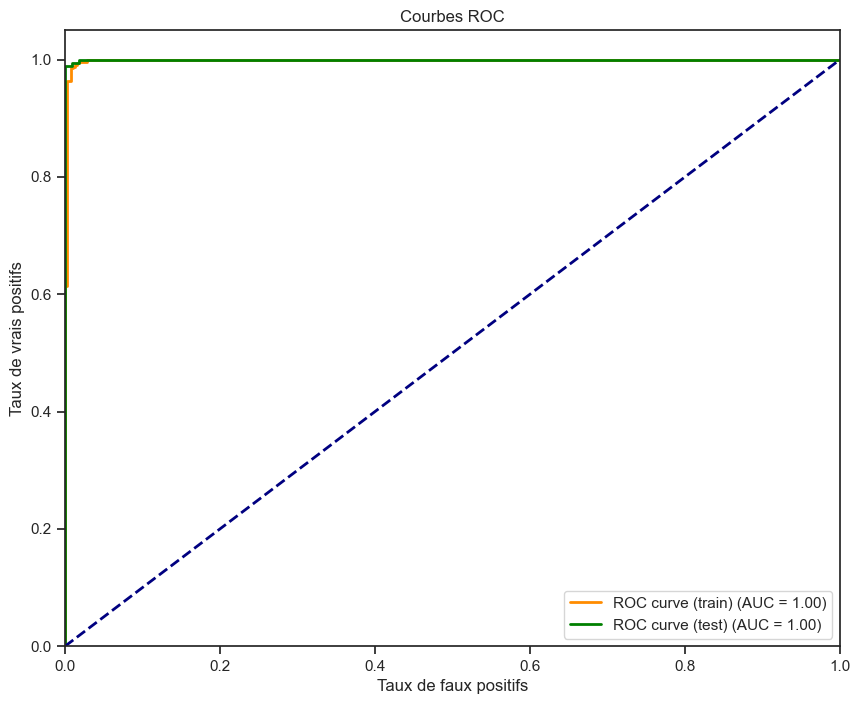

In [137]:
# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

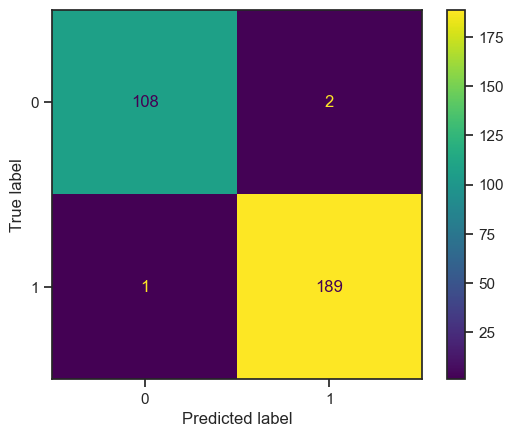

In [138]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

2 faux positifs et 1 faux négatif

In [139]:
# Calcul du taux d'erreur de classification

CE = (1/X_test.shape[0])*sum(y_test!=y_pred)
CE

0.01

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.2 - Sans la variable la moins significative (diagonal)</h3>

In [140]:
# Séparation des variables prédictives et de la variable cible
X_train = train.drop(['diagonal','is_genuine'], axis=1)
y_train = train['is_genuine']


X_test = test.drop(['diagonal','is_genuine'], axis=1)
y_test = test['is_genuine']

In [141]:
# Créer le modèle de régression logistique

logit_model2 = sm.Logit(y_train, X_train)

In [142]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model2.fit()

Optimization terminated successfully.
         Current function value: 0.030516
         Iterations 12


In [143]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.9516
Time:                        18:32:57   Log-Likelihood:                -36.620
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                2.739e-309
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -148.0906    174.917     -0.847      0.397    -490.922     194.741
height_left     -1.8631      1.274     -1.463      0.144      -4.360       0.634
height_right    -2.2233      1.093     -2.03

In [144]:
# Vérification de non colinéarité

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  305292.144525
1   height_left       1.146814
2  height_right       1.258813
3    margin_low       1.922936
4     margin_up       1.423212
5        length       2.210590


In [145]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

In [146]:
# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



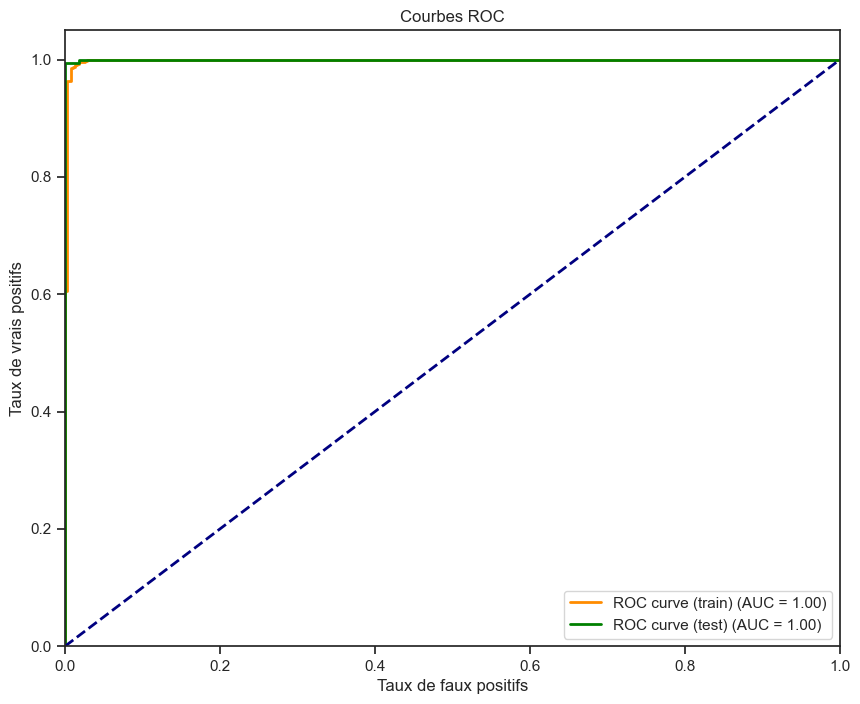

In [147]:
# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

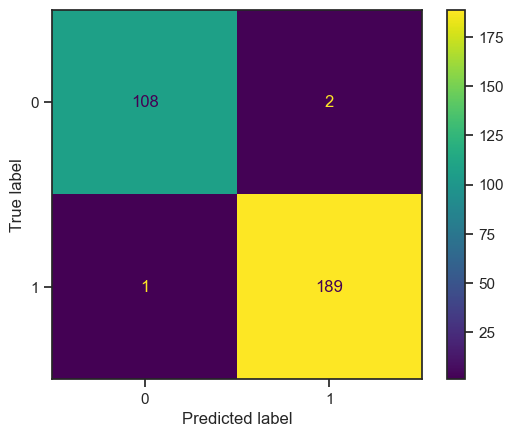

In [148]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Encore 2 faux positifs et 1 faux négatif

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.3 - Sans la variable la moins significative (constante) </h3>

In [149]:
# Séparation des variables prédictives et de la variable cible 
X_train = train.drop(['diagonal','const','is_genuine'], axis=1)
y_train = train['is_genuine']


X_test = test.drop(['diagonal','const','is_genuine'], axis=1)
y_test = test['is_genuine']

In [150]:
# Créer le modèle de régression logistique

logit_model3 = sm.Logit(y_train, X_train)

In [151]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model3.fit()

Optimization terminated successfully.
         Current function value: 0.030825
         Iterations 11


In [152]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.9511
Time:                        18:32:58   Log-Likelihood:                -36.990
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                1.963e-310
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_left     -2.4744      1.070     -2.314      0.021      -4.571      -0.378
height_right    -2.6582      0.979     -2.715      0.007      -4.577      -0.739
margin_low      -5.2354      0.911     -5.74

**Cette fois-ci, toutes nos variables sont statistiquement significatives (coeff statistiquement différents de 0 avec p-valeur < 0.05)**


In [153]:
# Vérification de non colinéarité

# Ajouter une colonne constante 
X = sm.tools.tools.add_constant(X_train.iloc[:, 0:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  305292.144525
1   height_left       1.146814
2  height_right       1.258813
3    margin_low       1.922936
4     margin_up       1.423212
5        length       2.210590


In [154]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

In [155]:
# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



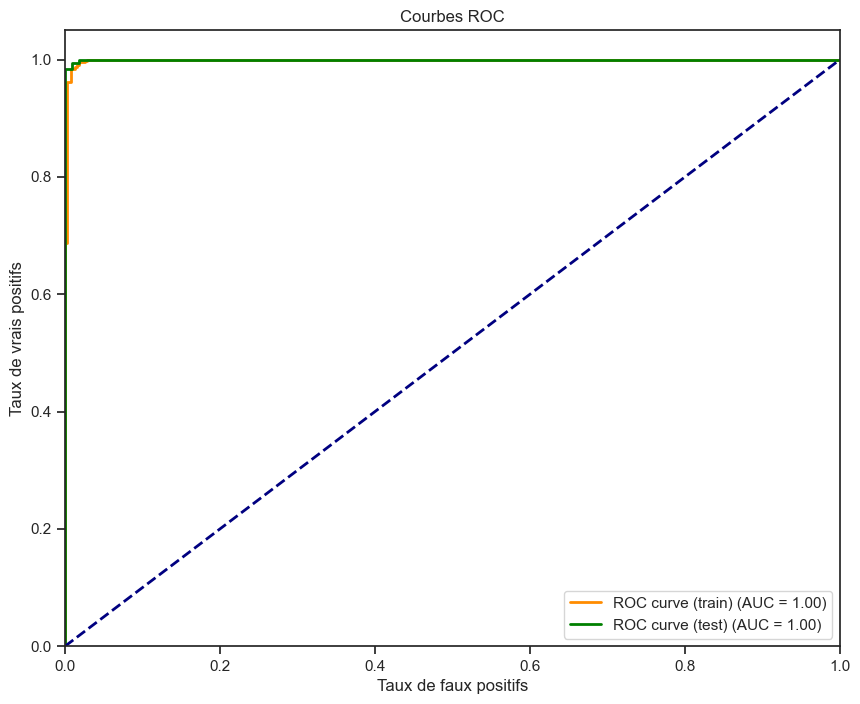

In [156]:
# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

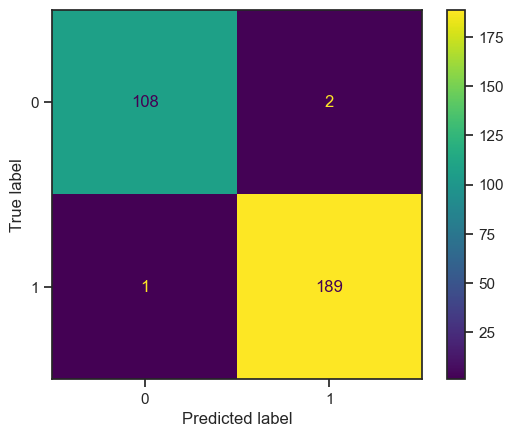

In [157]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Mêmes résultats : 2 faux positifs et un faux négatif. 

**Nous retenons pour le moment ce modèle, puisqu'il fait le moins d'erreurs, et qu'on peut encore l'optimiser.**

Testons d'abord cette configuration avec les données scalées.

In [158]:
# Calcul du taux d'erreur de classification

CE = (1/X_test.shape[0])*sum(y_test!=y_pred)
CE

0.01

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.4 - Avec les mêmes variables normalisées </h3>

In [159]:
# Séparation des variables prédictives et de la variable cible
X_train_scaled = train_scaled.drop(['diagonal','is_genuine','const'], axis=1)
y_train_scaled = train_scaled['is_genuine']


X_test_scaled = test_scaled.drop(['diagonal','is_genuine','const'], axis=1)
y_test_scaled = test_scaled['is_genuine']

In [160]:
# Créer le modèle de régression logistique

logit_model_scaled = sm.Logit(y_train_scaled, X_train_scaled)

In [161]:
# Ajuster le modèle aux données d'apprentissage

result_scaled = logit_model_scaled.fit()

Optimization terminated successfully.
         Current function value: 0.052582
         Iterations 11


In [162]:
# Afficher le résumé des résultats de la régression

print(result_scaled.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.9166
Time:                        18:32:58   Log-Likelihood:                -63.099
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                4.128e-299
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_left     -0.5894      0.247     -2.386      0.017      -1.073      -0.105
height_right    -0.5733      0.266     -2.156      0.031      -1.095      -0.052
margin_low      -4.3684      0.616     -7.08

In [163]:
# Vérification de non colinéarité

# Ajouter une colonne constante 
X_scaled = sm.tools.tools.add_constant(X_train_scaled.iloc[:, 0:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable       VIF
0         const  1.000393
1   height_left  1.146814
2  height_right  1.258813
3    margin_low  1.922936
4     margin_up  1.423212
5        length  2.210590


In [164]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test

y_train_scaled_pred = result_scaled.predict(X_train_scaled)
y_test_scaled_pred = result_scaled.predict(X_test_scaled)

In [165]:
# Prédire les classes sur la base de test
y_pred_scaled = result_scaled.predict(X_test_scaled) > 0.5

In [166]:
# Générer le rapport de classification
report = classification_report(y_test_scaled, y_pred_scaled)

In [167]:
# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.98      0.99       190

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [168]:
# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_scaled, y_train_scaled_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_scaled, y_test_scaled_pred)
roc_auc_test = auc(fpr_test, tpr_test)

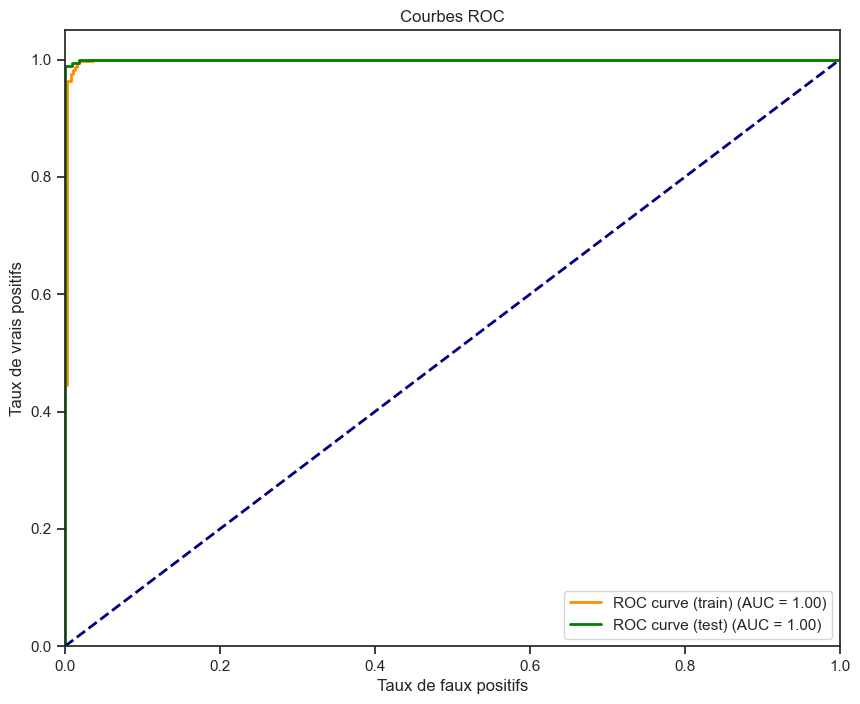

In [169]:
# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [170]:
# Calcul du taux d'erreur de classification

CE = (1/X_test_scaled.shape[0])*sum(y_test_scaled!=y_pred_scaled)
CE

0.013333333333333334

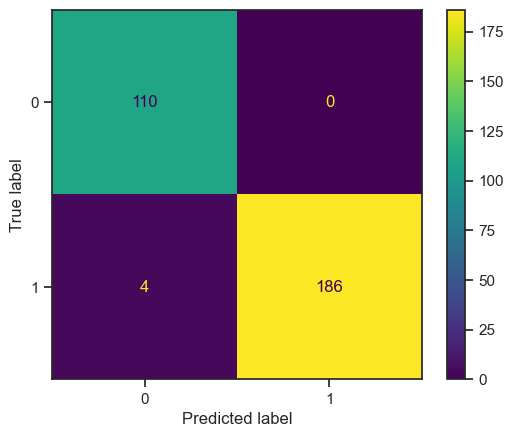

In [171]:
cm = confusion_matrix(y_test_scaled, y_pred_scaled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Pas de faux positifs mais cependant 4 vrais billets ont été classés dans les faux.

Ce modèle faisant plus d'erreurs, nous allons conserver le précédent, avec les données non normalisées.

Nous allons maintenant **améliorer sa performance en déterminant le seuil optimal,** qui était jusque là à 0.5.

Notre problématique étant toujours de détecter un maximum de faux billets, nous devons donc maximiser la précision (pour éviter les faux positifs) ainsi que le que le F1 score, puisque les deux classes sont désiquilibrées (plus de vrais billets que de faux)

**Nous testerons différentes approches afin de déterminer le seuil optimal.**


<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.5 - Calcul du seuil optimal </h3>

**Approche basée sur la courbe ROC (Receiver Operating Characteristic)**

La courbe ROC représente la performance du modèle de classification pour différents seuils de classification en traçant le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité).

Le seuil optimal est choisi en maximisant la somme de la sensibilité et de la spécificité, ce qui correspond à un point sur la courbe ROC le plus proche possible du coin supérieur gauche. Ce point est souvent appelé point de fonctionnement optimal (OFP) et représente un compromis entre la sensibilité et la spécificité du modèle.

In [172]:
# Séparation des variables prédictives et de la variable cible 
X_train = train.drop(['diagonal','const','is_genuine'], axis=1)
y_train = train['is_genuine']


X_test = test.drop(['diagonal','const','is_genuine'], axis=1)
y_test = test['is_genuine']

In [173]:
# Calcul de la prédiction et de la probabilité

y_test_pred = result.predict(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
y_test_pred.describe()

count    3.000000e+02
mean     6.350258e-01
std      4.717862e-01
min      6.318299e-10
25%      7.247956e-04
50%      9.956795e-01
75%      9.998902e-01
max      1.000000e+00
dtype: float64

In [174]:
# Calcul du point de fonctionnement optimal (max de (taux de vrais positifs - taux de faux positifs))

opti_idx = np.argmax(tpr_test - fpr_test)
opti_threshold = thresholds_test[opti_idx]

In [175]:
opti_threshold

0.6205799352273857

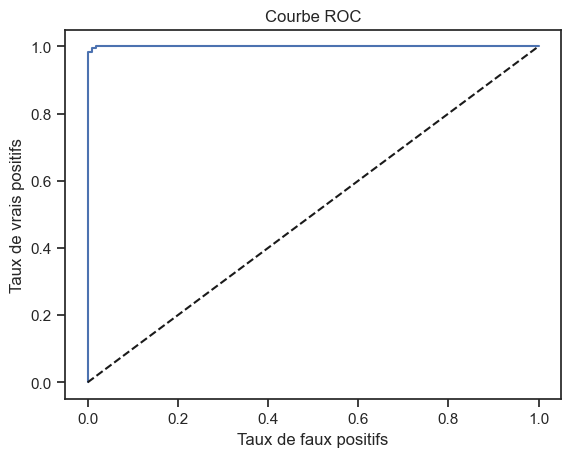

In [176]:
# Tracer la courbe ROC

plt.plot(fpr_test, tpr_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.show()

In [177]:
# Prédire les classes sur la base de test avec le nouveau seuil

y_pred = result.predict(X_test) > opti_threshold

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



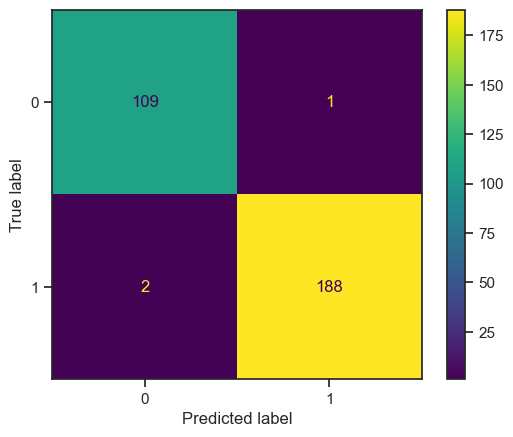

In [178]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**2 faux négatifs pour 1 faux positif**

**Approche de la précision, du rappel et du F1-score**

La méthode de sélection du seuil à partir de la courbe de précision-rappel consiste à trouver le seuil qui maximise l'équilibre entre la précision et le rappel du modèle de classification binaire. Cette méthode trace la courbe de précision-rappel en fonction des seuils de classification et identifie le seuil optimal en trouvant le point où la précision et le rappel sont équilibrés.

La précision mesure la proportion de vrais positifs parmi les prédictions positives, tandis que le rappel mesure la proportion de vrais positifs parmi les observations positives.

In [179]:
from sklearn.metrics import precision_recall_curve

# Prédire les probabilités des classes sur l'ensemble de test
y_pred_test = result.predict(X_test)

# Calculer la courbe de précision-rappel
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)

# Trouver le seuil optimal
optimal_idx = np.argmax(precision + recall)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.40207795931072104

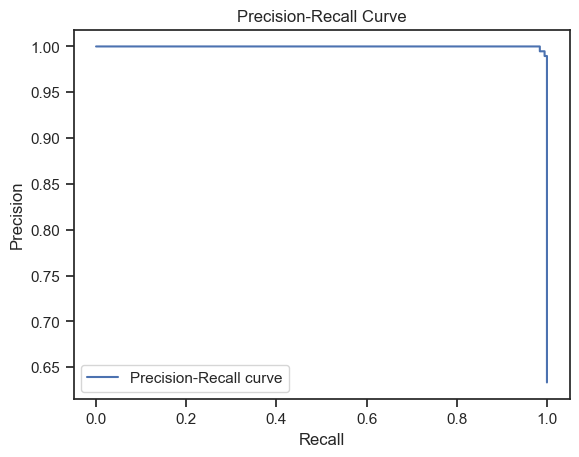

In [180]:
# Tracer la courbe de précision-rappel
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [181]:
# Prédire les classes sur la base de test avec le nouveau seuil
y_pred = result.predict(X_test) > optimal_threshold

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



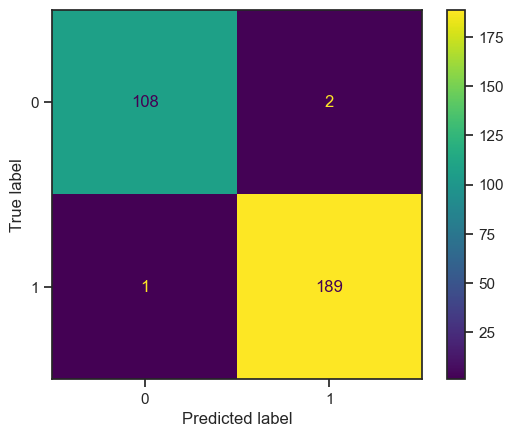

In [182]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Moins performant : 1 vrai billet classé dans les faux, et 2 faux billets classés dans les vrais**

**La méthode de la classification coût-sensible**

In [183]:
# Importation de la fonction coût sensible

def calculate_cost(y_true, y_pred, fp_cost, fn_cost, vp_cost, vn_cost):
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    vp = ((y_true == 1) & (y_pred == 1)).sum()
    vn = ((y_true == 0) & (y_pred == 0)).sum()
    cost = fp * fp_cost + fn * fn_cost + vp * vp_cost + vn * vn_cost
    return cost

In [184]:
# Ajustement des coûts sur les faux négatifs

thresholds = np.arange(0, 1, 0.01)
fp_cost = 10  # Coût des faux positifs
fn_cost = 1 # Coût des faux négatifs
vp_cost = 0  # Coût des vrais positifs
vn_cost = 0  # Coût des vrais négatifs
costs = []
for threshold in thresholds:
    y_pred = (y_pred_test > threshold).astype(int)
    cost = calculate_cost(y_test, y_pred, fp_cost, fn_cost, vp_cost, vn_cost)
    costs.append(cost)

In [185]:
optimal_threshold = thresholds[np.argmin(costs)]
optimal_threshold

0.77

In [186]:
# Prédire les classes sur la base de test avec le nouveau seuil
y_pred = result.predict(X_test) > optimal_threshold

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.98      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



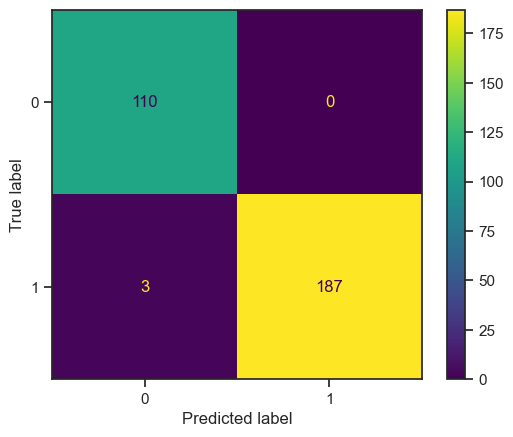

In [187]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Cette fois-ci, notre modèle ne laisse passer aucun faux billet. 
Il classe cependant 3 vrais billets dans les faux.

Nous retiendrons donc ce seuil.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.6 - Entraînement du modèle retenu sur l'ensemble de nos données</h3>

In [188]:
# On va entraîner notre modèle sur l'ensemble de nos données avant de faire la prédiction 

# Séparation des variables prédictives et de la variable cible

X_train = df.drop(['diagonal','is_genuine'], axis=1)
y_train = df['is_genuine']

In [189]:
# Ajuster le modèle aux données d'apprentissage

result = logit_model3.fit()

Optimization terminated successfully.
         Current function value: 0.030825
         Iterations 11


In [190]:
# Afficher le résumé des résultats de la régression

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.9511
Time:                        18:32:59   Log-Likelihood:                -36.990
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                1.963e-310
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_left     -2.4744      1.070     -2.314      0.021      -4.571      -0.378
height_right    -2.6582      0.979     -2.715      0.007      -4.577      -0.739
margin_low      -5.2354      0.911     -5.74

In [191]:
# Vérification de non colinéarité

# Ajouter une colonne constante 
X = sm.tools.tools.add_constant(X_train.iloc[:, 0:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  311412.190636
1   height_left       1.154714
2  height_right       1.259900
3    margin_low       1.927896
4     margin_up       1.419253
5        length       2.138561


In [192]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement 

y_train_pred = result.predict(X_train)

In [193]:
y_train_pred

0       6.155708e-01
1       9.999938e-01
2       9.992244e-01
3       9.999969e-01
4       8.170696e-01
            ...     
1495    3.489496e-03
1496    1.666880e-07
1497    9.391548e-05
1498    6.448166e-04
1499    2.461433e-02
Length: 1500, dtype: float64

In [194]:
# Prédire les classes sur la base du train

y_pred = result.predict(X_train) >  optimal_threshold

In [195]:
# Générer le rapport de classification

report = classification_report(y_train, y_pred)

In [196]:
# Afficher le rapport de classification

print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.98      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [197]:
# Calculer les courbes ROC et les aires sous la courbe (AUC)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred)
roc_auc_train = auc(fpr_train, tpr_train)


# fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
# roc_auc_test = auc(fpr_test, tpr_test)

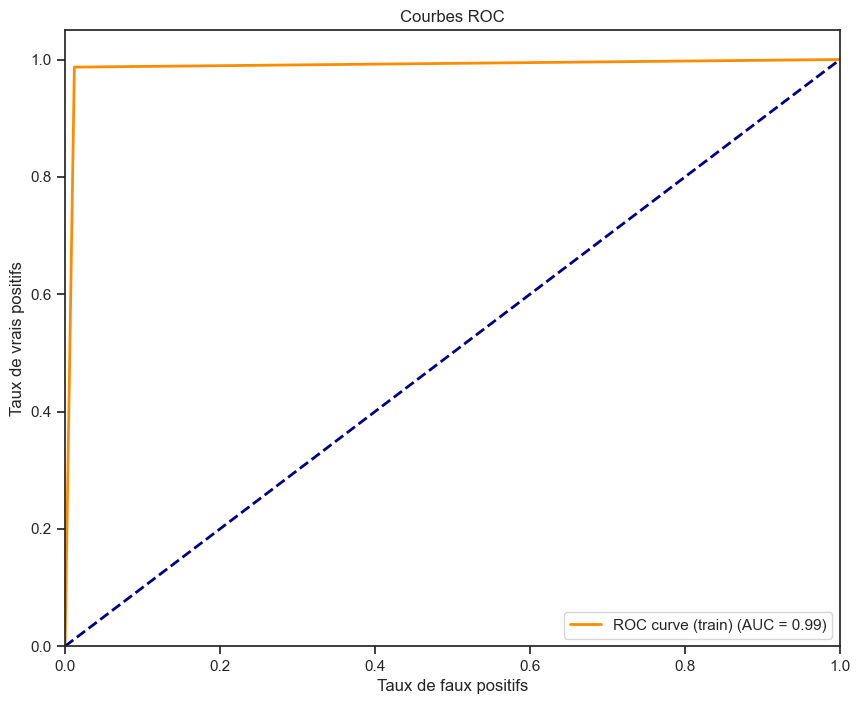

In [198]:
# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
#plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

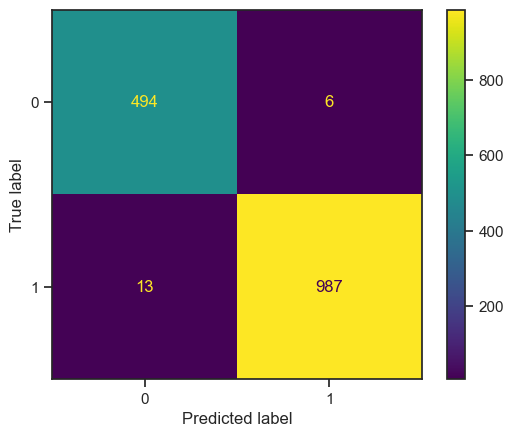

In [199]:
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Seulement 6 faux billets ont été mal prédits (sur la base des 1500 billets). 

Notre modèle est prêt et entraîné, nous allons maintenant pouvoir faire de la prédiction

In [200]:
# Calcul du taux d'erreur de classification

CE = (1/X_train.shape[0])*sum(y_train!=y_pred)
CE

0.012666666666666666

Text(0.5, 0.92, 'Projection des prédictions sur les 3 dimensions')

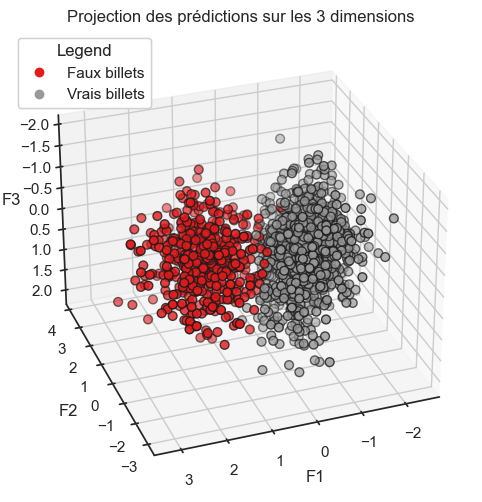

In [201]:
# Visualisation des prédictions sur les axes de la PCA :

labels = y_pred
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# On affiche nos points : 
scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, edgecolor="k", cmap="Set1", s=40)

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Faux billets','Vrais billets']], 
                    title="Legend", loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des prédictions sur les 3 dimensions')

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">7.7 - Test final du modèle</h3>

In [209]:
# Importation du fichier test

df_test = pd.read_csv('billets_production.csv', sep=',', index_col=6)

In [210]:
df_test

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [211]:
# Préparation des données 

names_test = df_test.index

# Séparation des variables prédictives et de la variable cible

X_test = df_test.drop(['diagonal'], axis=1)

In [212]:
# Obtenir les prédictions du modèle

y_test_pred = result.predict(X_test)

In [213]:
# Prédire les classes sur la base de test

y_pred = result.predict(X_test) >  optimal_threshold


# Créer un df avec les classes pour plus de lisibilité 
# (True étant l'appartenance à la classe des faux billets (1), il faut les associer à la bonne classe)

predictions = pd.DataFrame(y_pred.index)
predictions['is_genuine'] = np.where(y_pred == True, True, False)
predictions['taux_proba'] = (y_test_pred.values)

In [214]:
predictions

,id,is_genuine,taux_proba
0,A_1,False,0.000229
1,A_2,False,0.000015
2,A_3,False,0.000023
3,A_4,True,0.980833
4,A_5,True,0.999987
